# Visualizing Monetary Policy

In this project, we will use the Federal Reserve balance sheet. We will create functions for visualizing relevant data in the overnight lending market.

The following scatterplot is reconstructed from chapter 6. We can change the color of the graph plots to represent time. It's important to save the files separtely in Spyder.

In [1]:
#plots.py

#os module allows you to access commandline 
#functions from python
import os
import pandas as pd
#math and data library
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40,20),
                    save_fig = False, pp = None):
    #gather variables from df
    plot_vars = list(df.keys())
    #cycle through each variable for x val
    for x in plot_vars:
        #cycle again for y value
        for y in plot_vars:
            #make sure that x does not equal y
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                #Create list of years from index
                #Years will be represented by color
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string
                    # only include first 4 characters, which is the year
                    # create an integer from those characters
                    df["Year"]=[int(str(ind)[:4])for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax = ax,
                                c = "Year", cmap = "viridis")
                
                # Turn the text on the x-axis so that it reads vertical
                ax.tick_params(axis = "x", rotation = 90)
                # get rid of tick lines
                ax.tick_params("both", length = 0, which="both")
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    #identify directory to save figure
                    directory = "plots/" + x[:12] + " " + y[:12] + "c=Year"
                    plt.savefig(directory + str(plot_vars).replace("[","").replace("]", "")[:40] + "scatter.png",
                               bbox_inches = "tight")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

Next we can create a functino to download data from FRED using pandas_datareader

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq="A"):
#2d would be every 2 days, 3m is 3 months, a quarter, we used A annual
    #check if new column is first column of data
    #if true then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            #rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True)
            i = None
        else:
            #if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
        
    return df
    #if not, add to existing dataframe


In [3]:
#fedProject.py
from datlib.stats import *
from datlib.plots import *
from datlib.FRED import *
data_codes = {"Base: Total":"BOGMBASEW",
              "Base: Currency in Circulation":"MBCURRCIRW"}
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

data

#fed is often in millions of dollars

Base: Total  Base: Currency in Circulation
DATE                                                  
1975-01-31    107789.25                       77860.50
1975-02-28    105592.00                       77009.50
1975-03-31    105505.25                       77693.25
1975-04-30    106762.00                       78466.60
1975-05-31    106920.75                       79176.50
...                 ...                            ...
2020-05-31   5139460.00                     1928941.25
2020-06-30   5059368.25                     1955540.75
2020-07-31   4725875.20                     1977793.40
2020-08-31   4790990.00                     2004558.50
2020-09-30   4876690.00                     2022000.00

[549 rows x 2 columns]

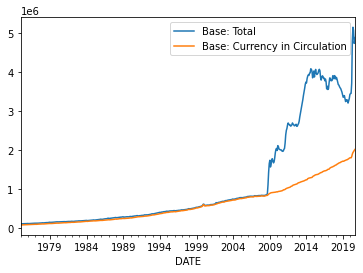

In [4]:
plt.rcParams.update({"font.size":10})
data.plot.line()

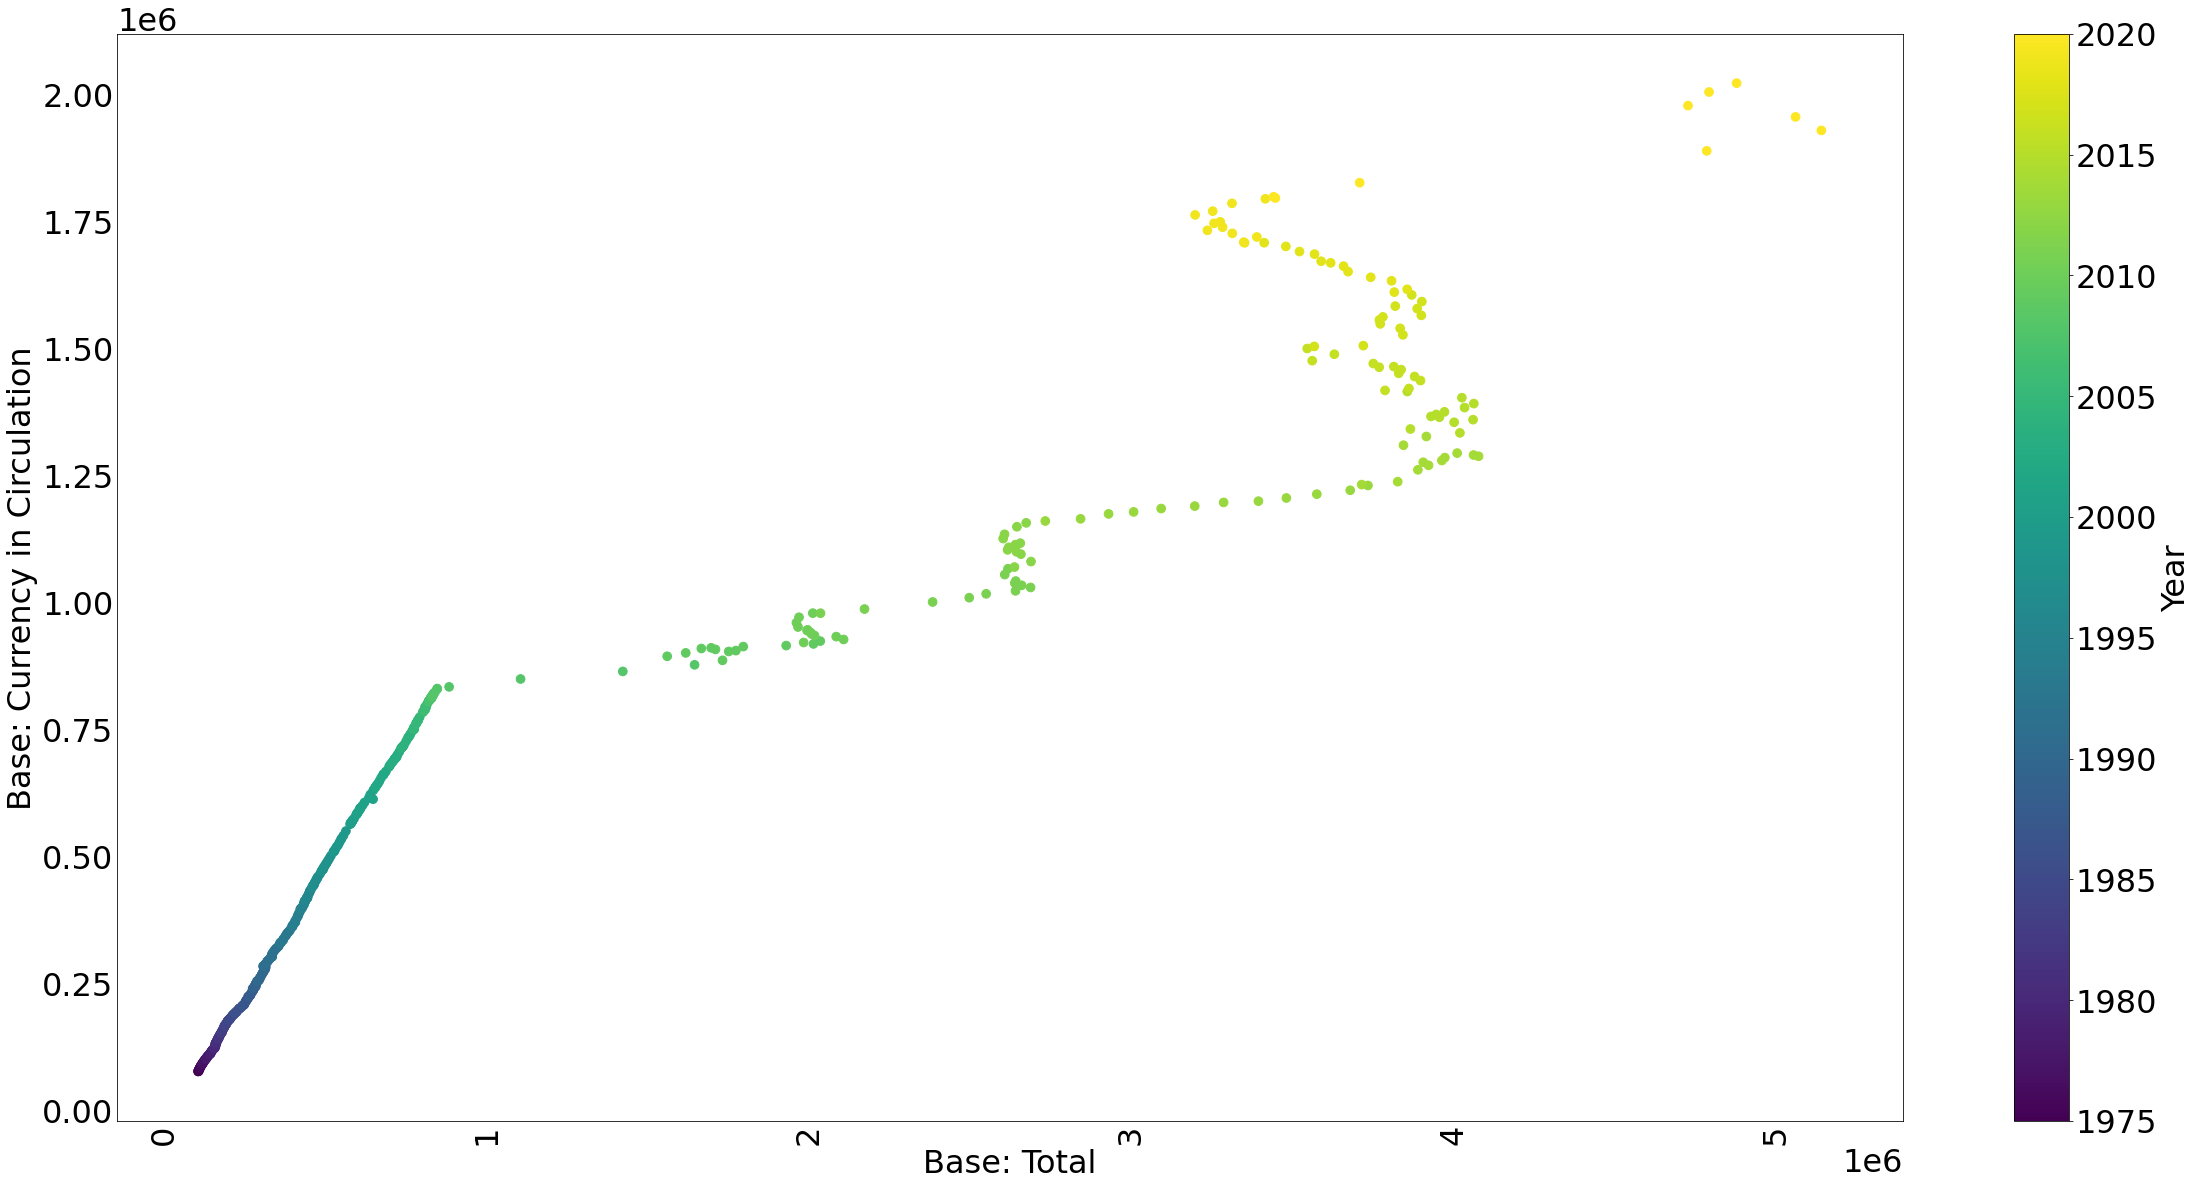

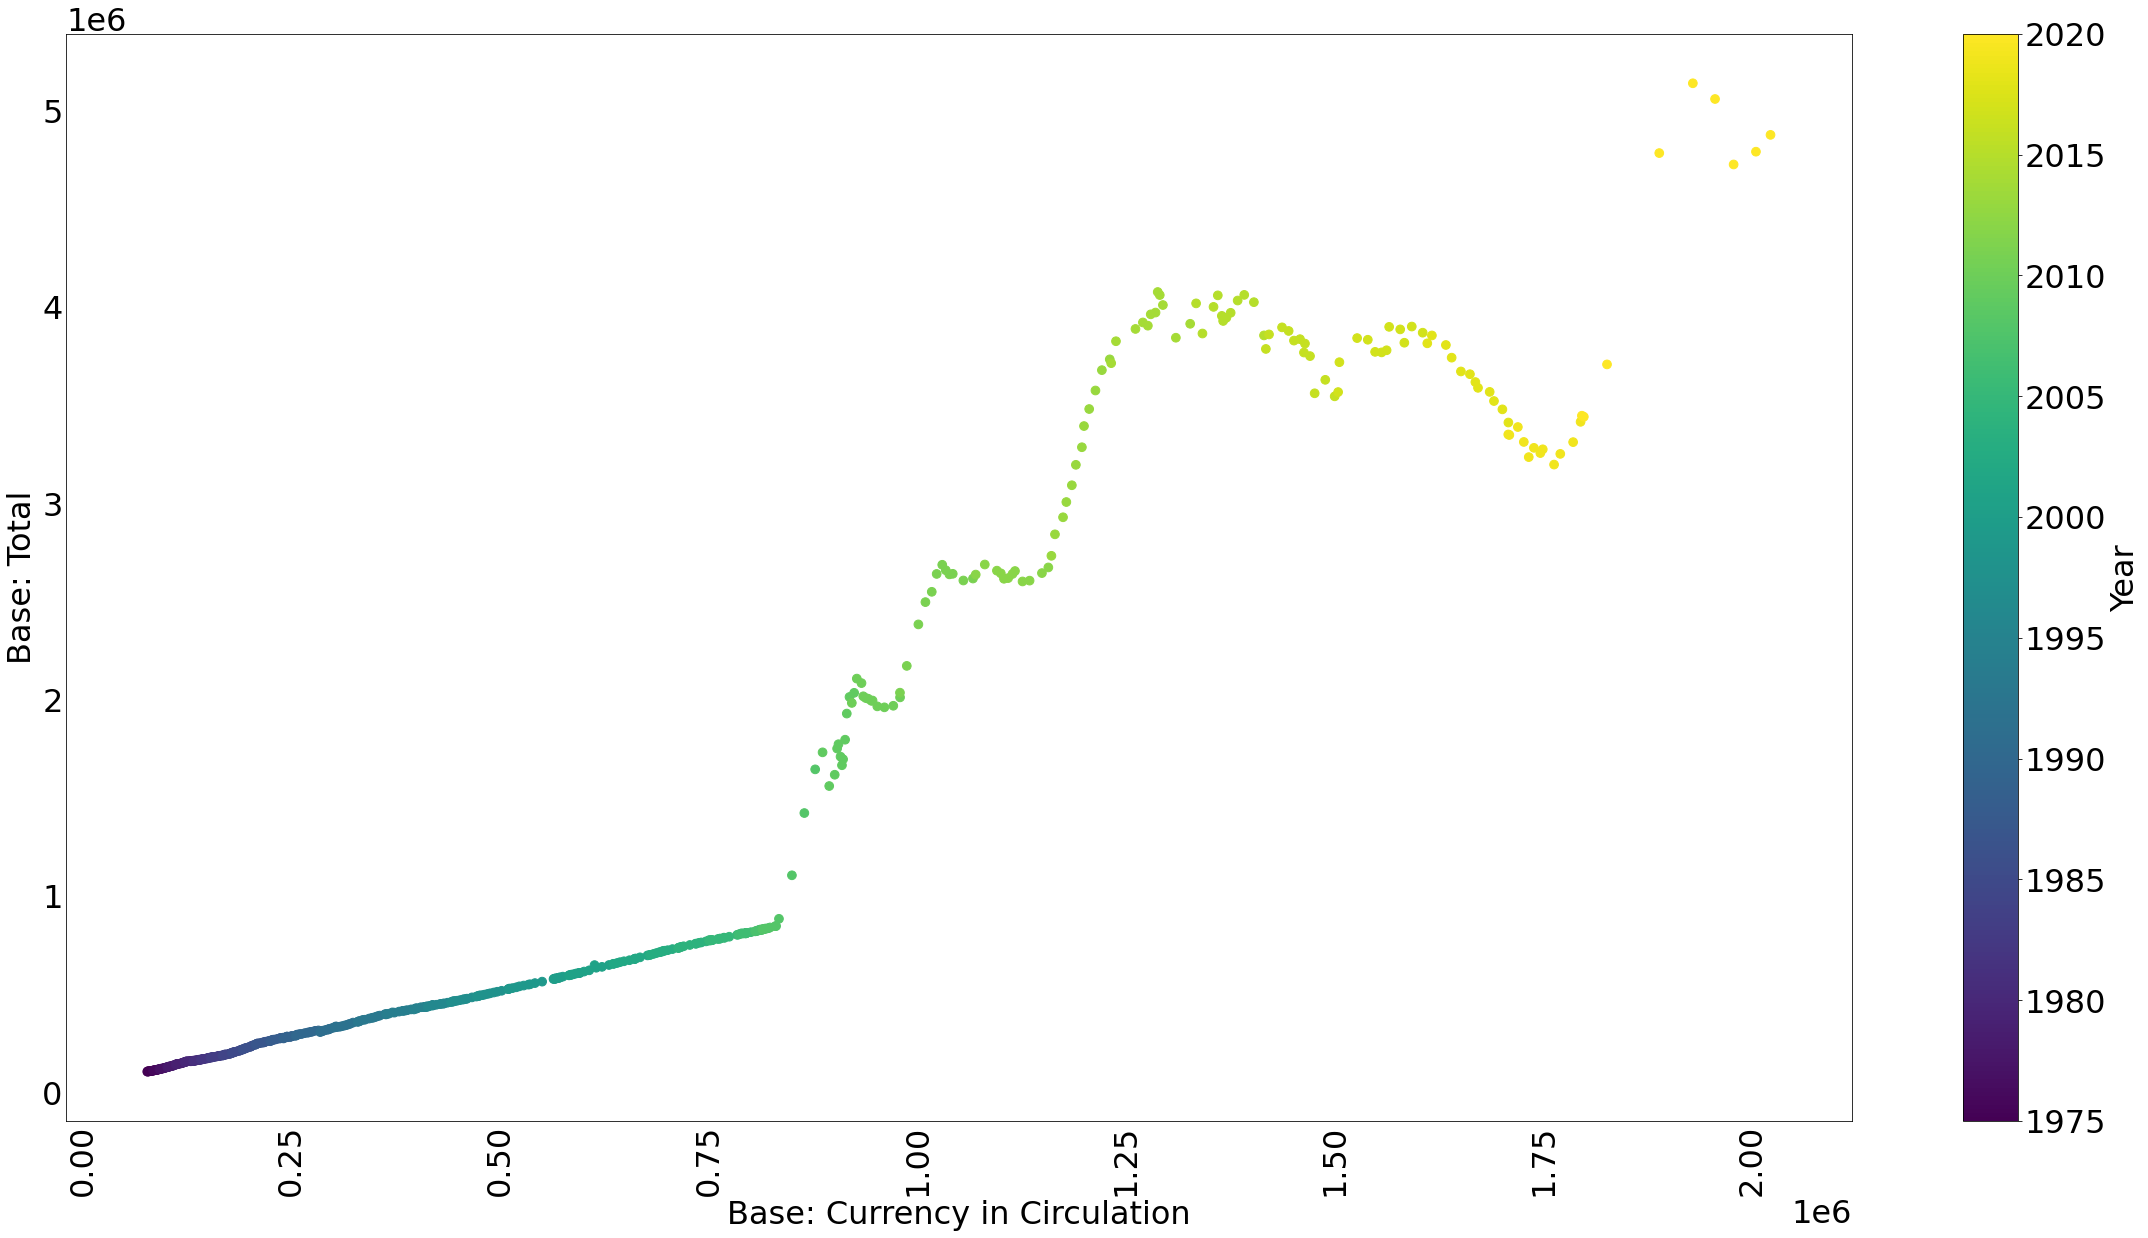

In [5]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

---

# Breaking down the Federal Reserve's Balance Sheet

The Fed is the central bank of the U.S. Their balance sheet, like all, contains Assets and Liabilities. Assets are things that the bank owns that have some value, such as a treasury note, whereas Liabilities are things that the Fed owes, say a deposit on an account from an investor or bank.

Traditionally , the Fed has purchased U.S. securities "U.S. Treasuries" from the government that Congress and the president approve for U.S. funding.

The Fed has issued Federal Reserve Notes as Liabilities. If they issue too many, then the value decreases. Now the Fed offers a variety of deposit accounts that holds as liabilities. So, they can create money and have it immediately returned back to the bank so that it doesn't create inflation.


In [6]:
def bil_to_mil(series):
#mult billion by 1000 to yield millions
    return series * 10 ** 3

We will use bil_to_mil() function to transform data defined in billions to units of millions

In [7]:
#FedProject.py
data_codes  = {"Base: Total ($ Mil)": "BOGMBASEW",
               "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

#These are start and end dates
start = datetime.datetime(2002,12,1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

#again, frequency is "D", "W", "M", "Q", "A"
data

Base: Total ($ Mil)  Base: Currency in Circulation ($ Mil)  \
DATE                                                                     
2002-12-31            697517.00                              676472.50   
2003-01-31            700446.80                              679511.20   
2003-02-28            700362.25                              679723.75   
2003-03-31            704898.00                              683568.25   
2003-04-30            709173.00                              686919.20   
...                         ...                                    ...   
2020-05-31           5139460.00                             1928941.25   
2020-06-30           5059368.25                             1955540.75   
2020-07-31           4725875.20                             1977793.40   
2020-08-31           4790990.00                             2004558.50   
2020-09-30           4876690.00                             2022000.00   

            Balance Sheet: Total Assets ($ Mil)  \
DATE                                              
2002-12-31                            725800.50   
2003-01-31                            724718.40   
2003-02-28                            721326.00   
2003-03-31                            723651.25   
2003-04-30                            736926.40   
...                                         ...   
2020-05-31                           6947555.25   
2020-06-30                           7127786.25   
2020-07-31                           6960429.40   
2020-08-31                           6975892.25   
2020-09-30                           7048374.20   

            Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)  \
DATE                                                                        
2002-12-31                                          672844.50               
2003-01-31                                          671196.20               
2003-02-28                                          668666.25               
2003-03-31                                          672446.00               
2003-04-30                                          685518.60               
...                                                       ...               
2020-05-31                                         6413832.00               
2020-06-30                                         6582068.00               
2020-07-31                                         6606989.60               
2020-08-31                                         6685136.00               
2020-09-30                                         6802569.00               

            Balance Sheet: Securities Held Outright ($ Mil)  \
DATE                                                          
2002-12-31                                        629409.50   
2003-01-31                                        629416.00   
2003-02-28                                        631911.75   
2003-03-31                                        639168.25   
2003-04-30                                        645508.60   
...                                                     ...   
2020-05-31                                       5843195.25   
2020-06-30                                       6048567.25   
2020-07-31                                       6188826.40   
2020-08-31                                       6283343.50   
2020-09-30                                       6397502.00   

            Balance Sheet: U.S. Treasuries Held Outright ($ Mil)  \
DATE                                                               
2002-12-31                                          629399.50      
2003-01-31                                          629406.00      
2003-02-28                                          631901.75      
2003-03-31                                          639158.25      
2003-04-30                                          645498.60      
...                                                       ...      
2020-05-31         

In [8]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                   "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [9]:
def plot_lines(df, linewidth = 1, figsize = (40,20), pp = None):
    
    fig, ax = plt.subplots(figsize = figsize)    
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([int(x) for x in vals]) 
    
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")  
    plt.savefig(filename[:50] + " line.png", 
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

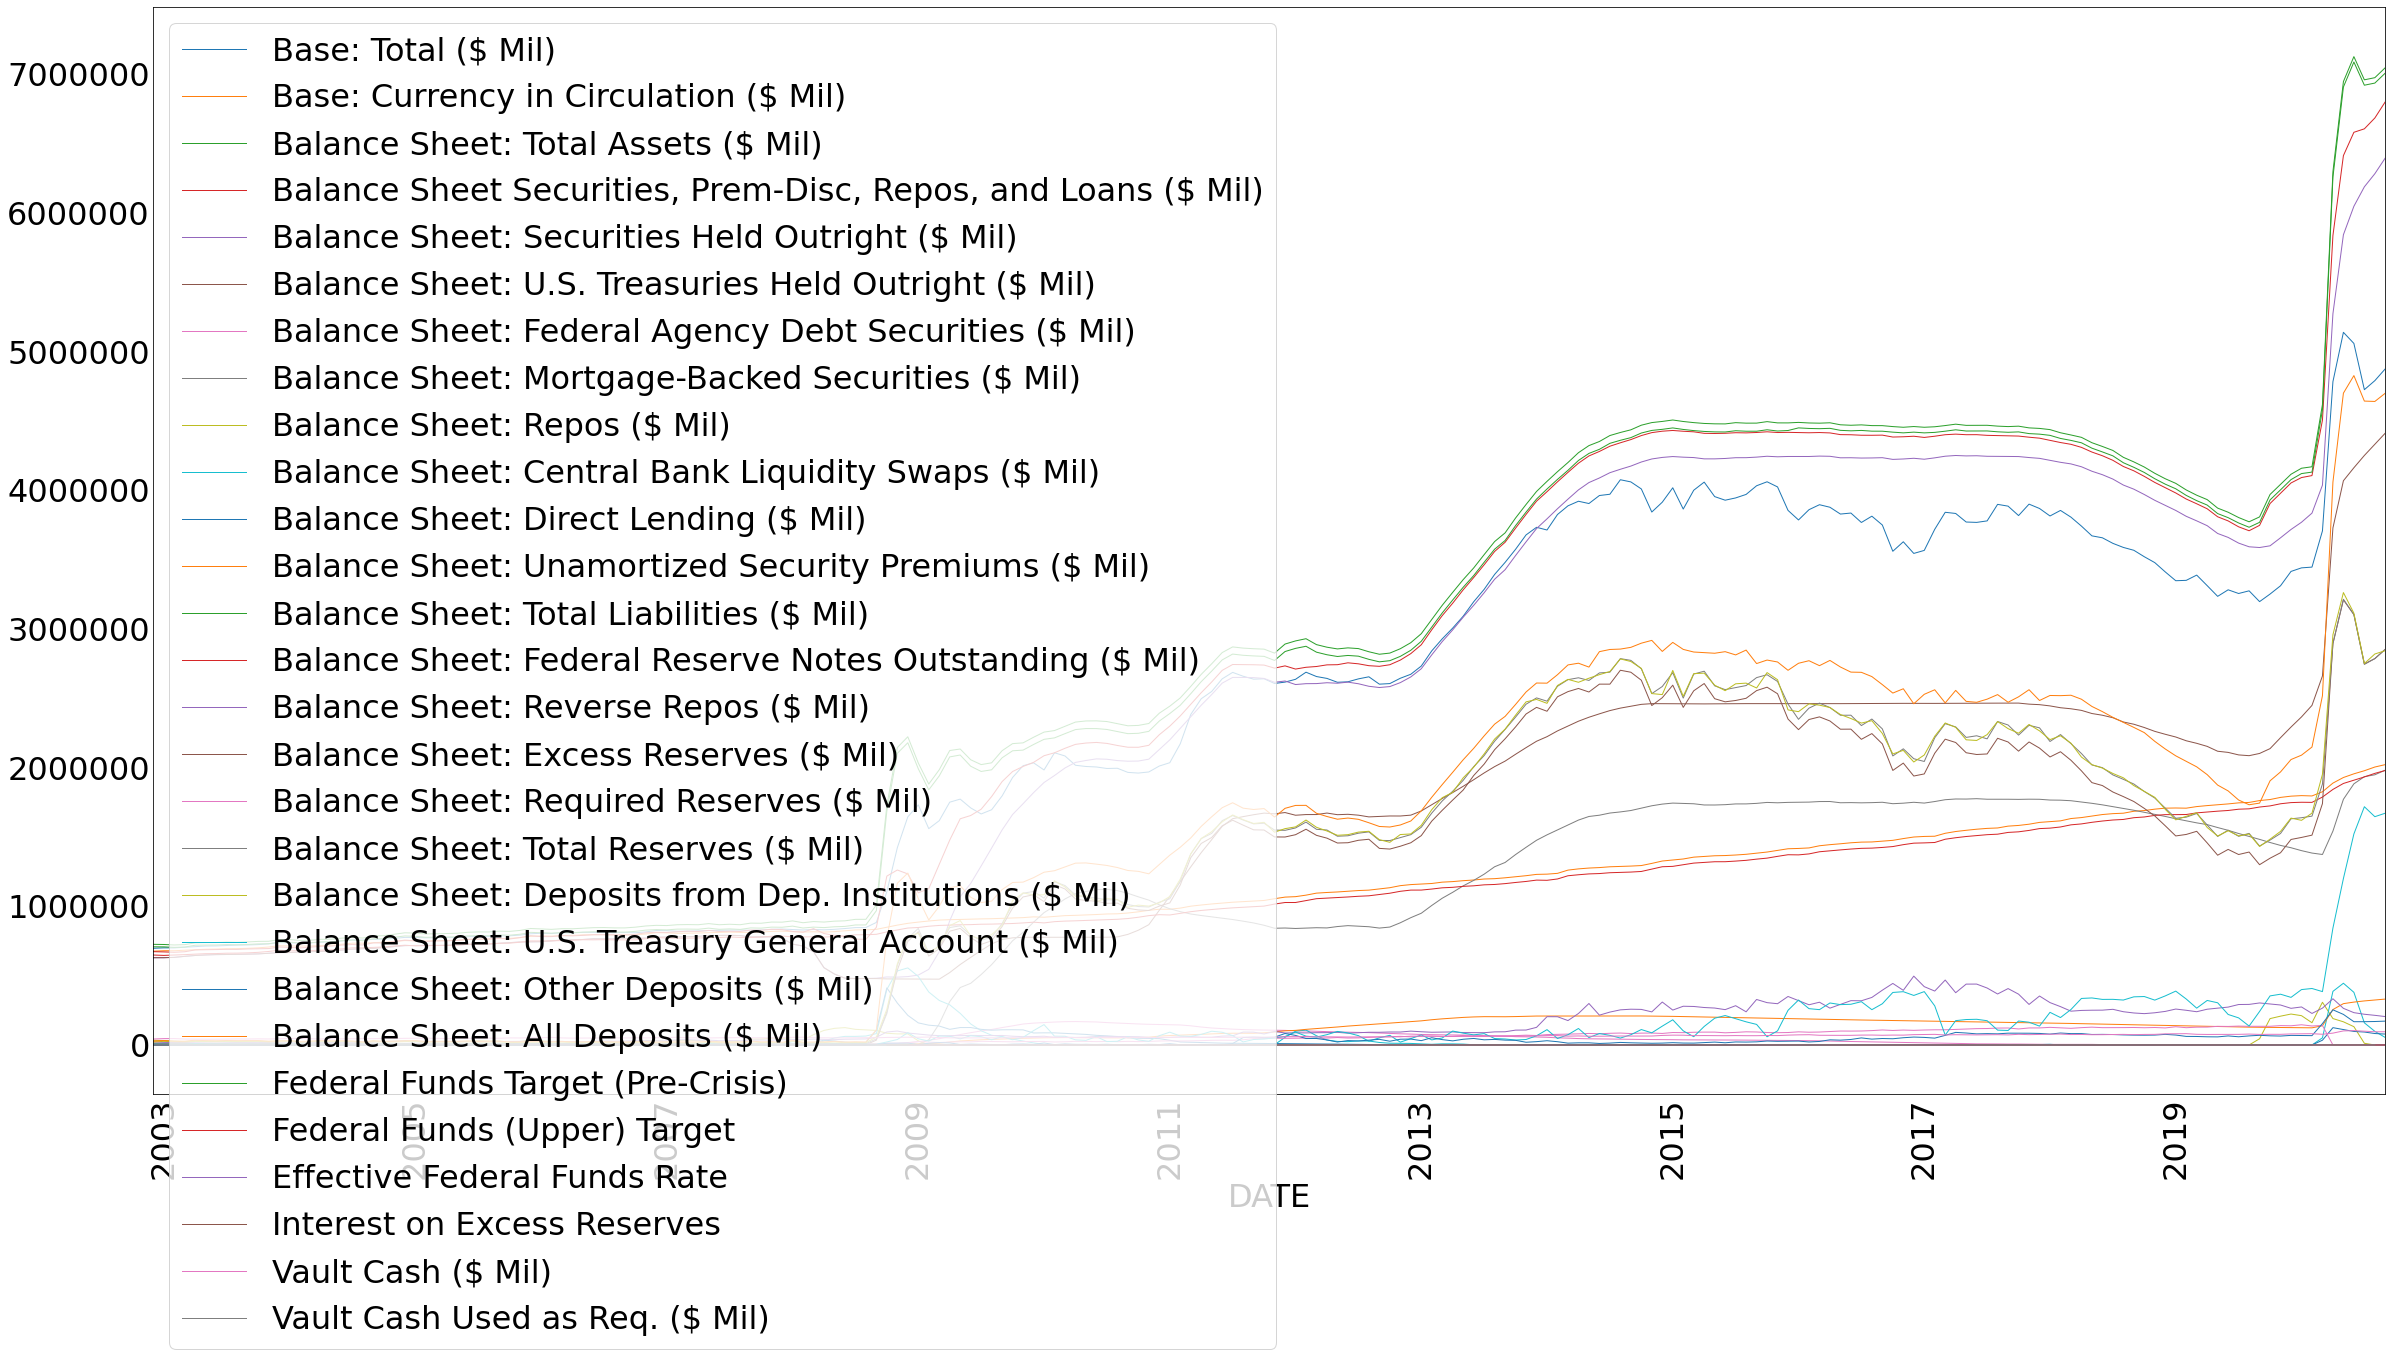

In [10]:
plot_lines(df = data, linewidth = 1, figsize = (40, 20), pp = None)

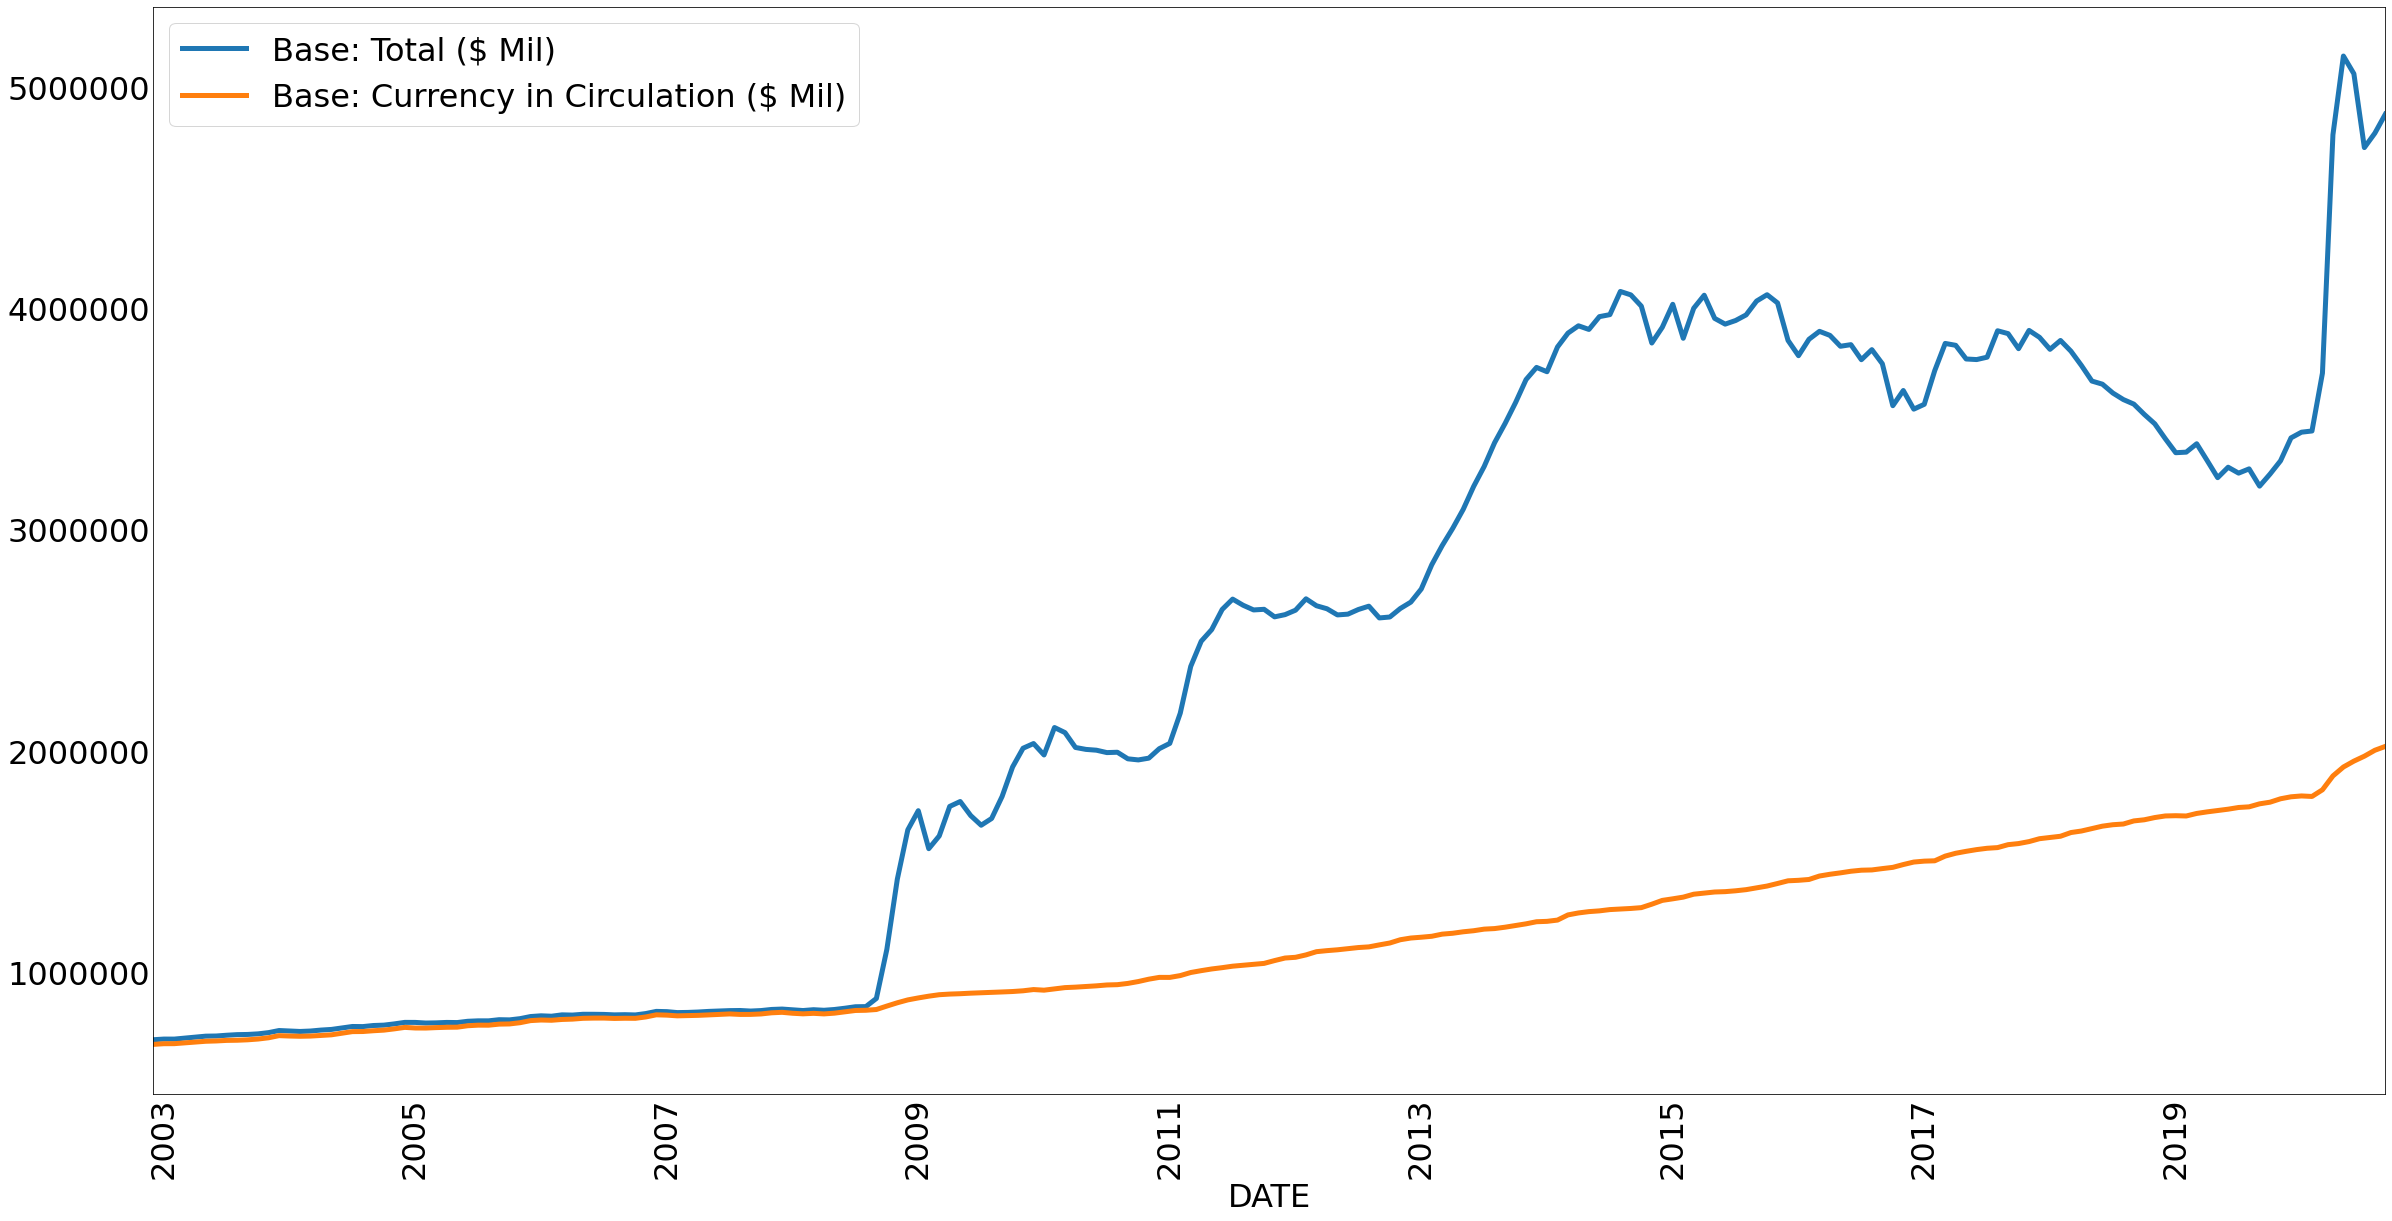

In [11]:
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

We can concentrate on a couple variables in order to see better and compare more efficiently

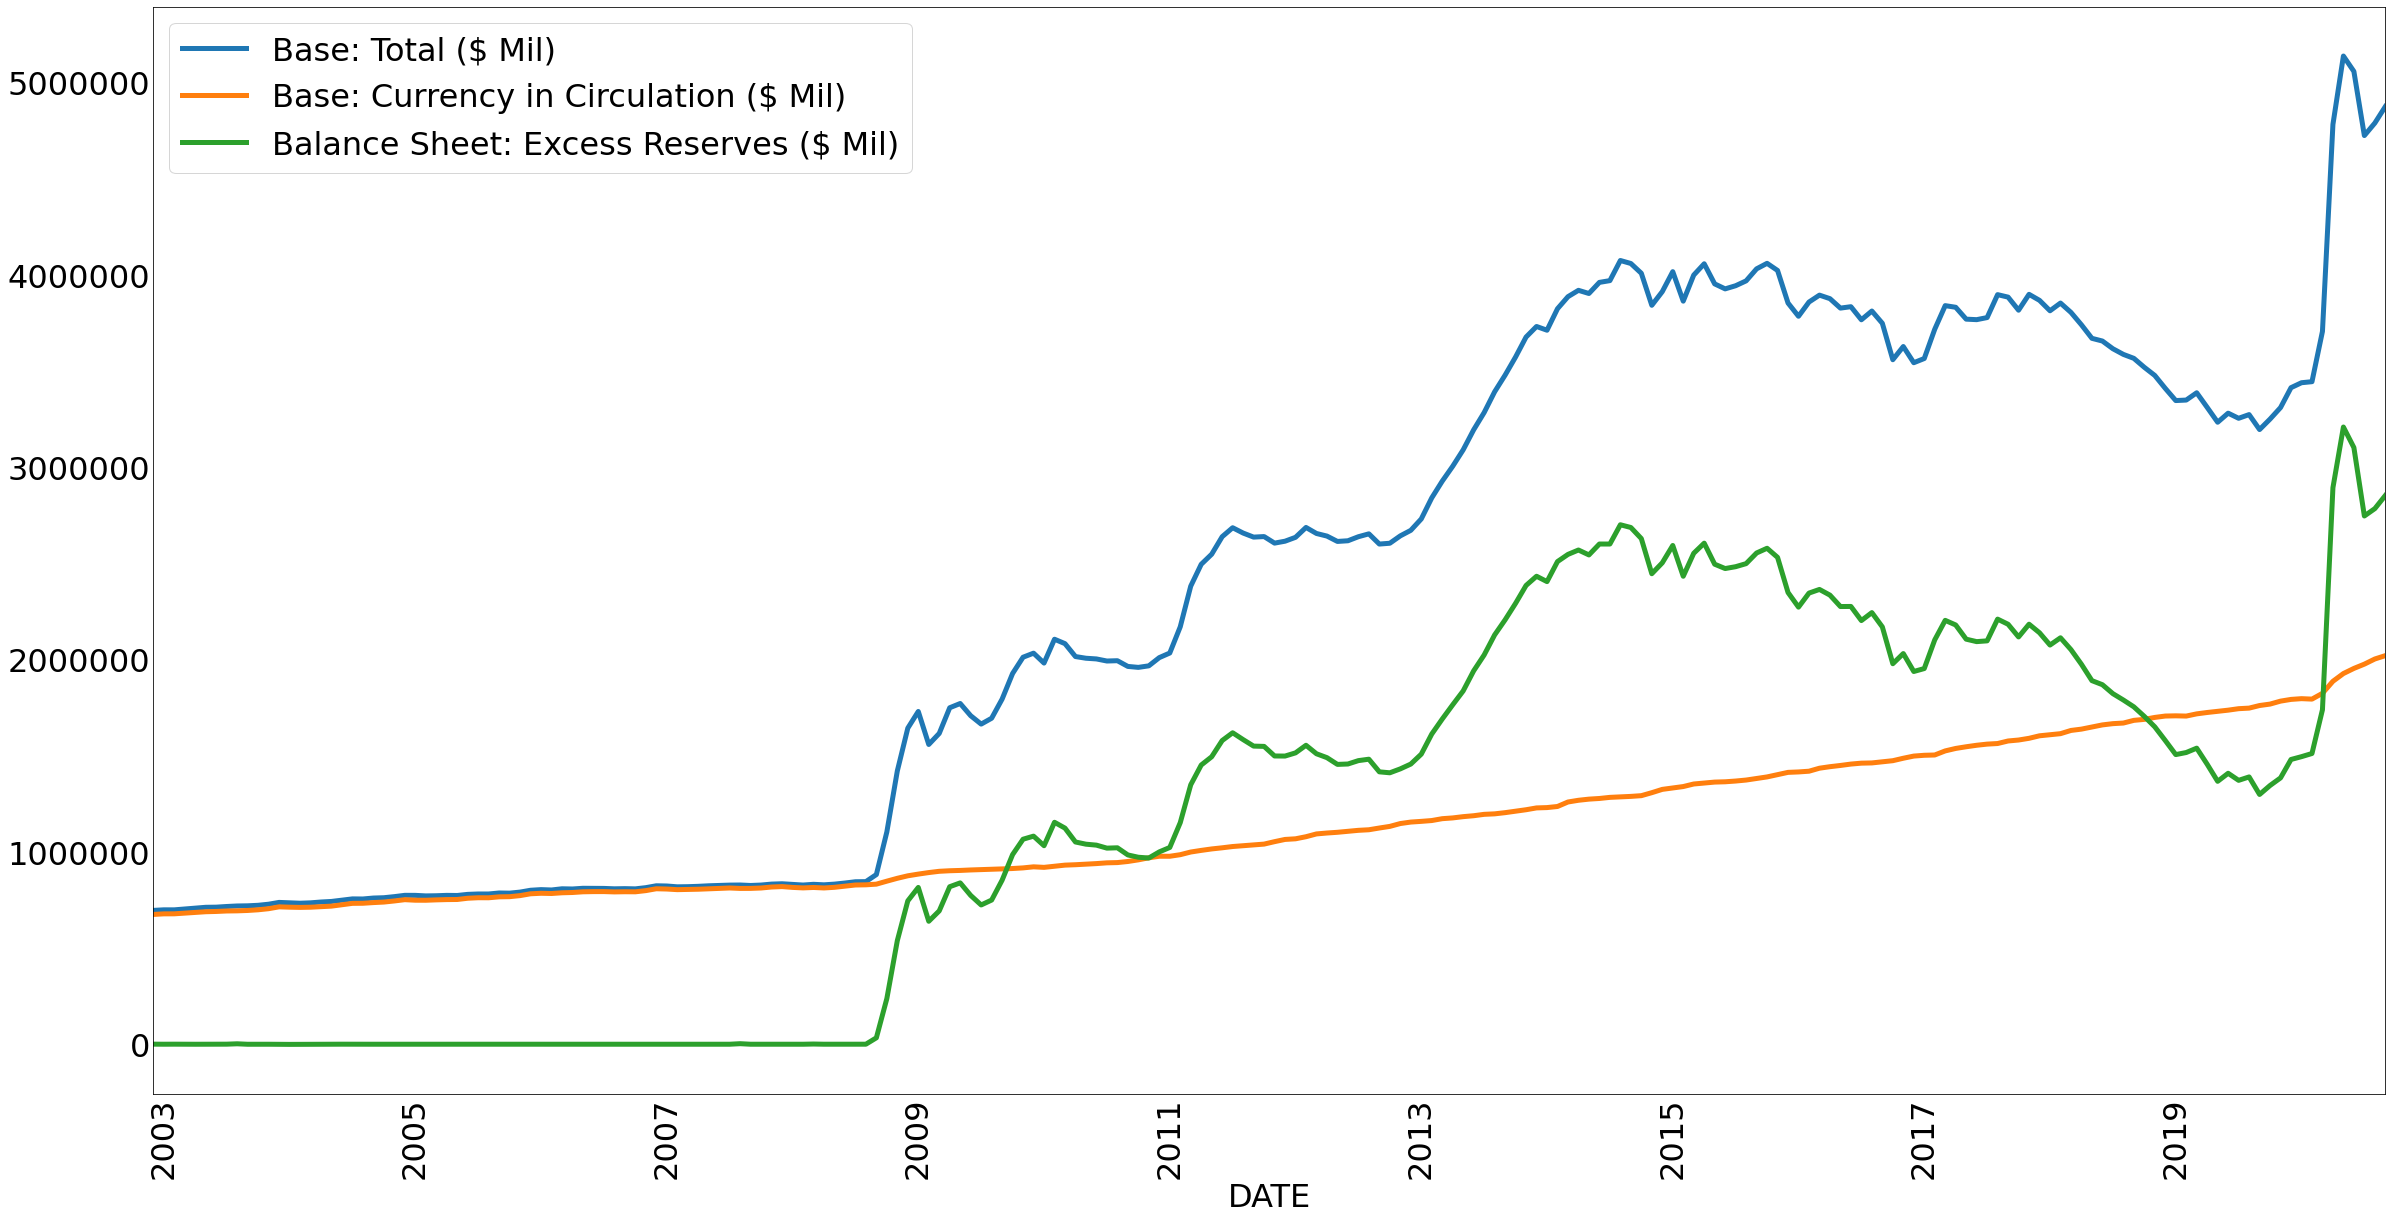

In [12]:
plt.rcParams.update({"font.size":32})
money_vars = ["Base: Total ($ Mil)",
              "Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

## Stacked Plots
You can create plots that stack the area of the lines instead of plotting the line relative to zero on the vert axis

In [13]:
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20),
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
    # df.plot.area()created a stack plot
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth, 
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax,
                                c = "k", label = total_var,
                                ls = "--")
    # place legend in top left corner of plot
    # format legend so that there are two columns of names
    ax.legend(loc = 2, ncol = 2)                                               

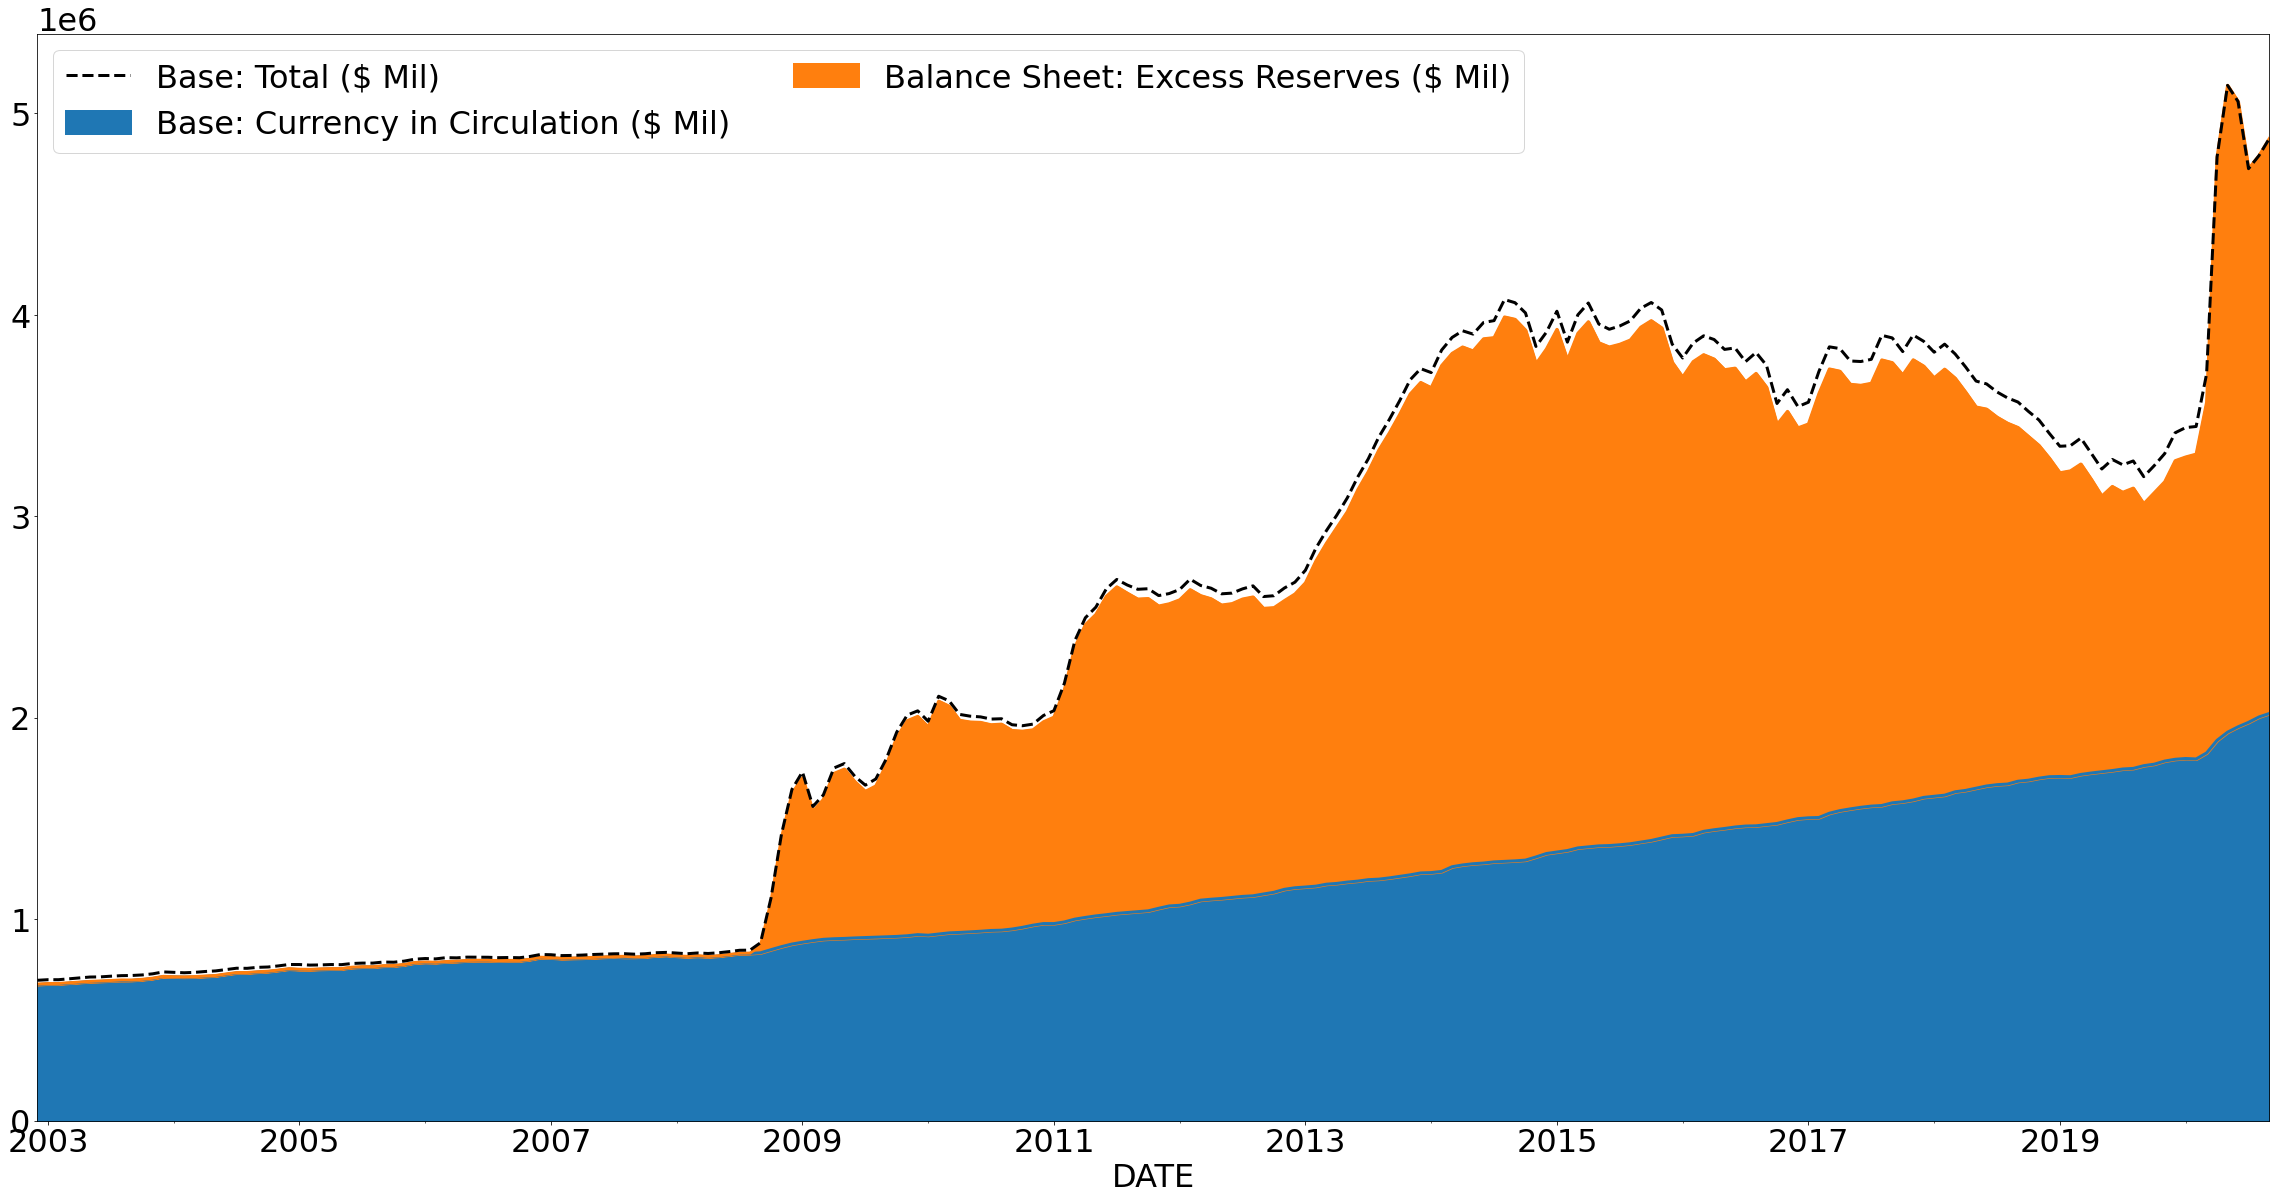

In [14]:
#fedProject.py
# for stacked plot, money_vars selects the vars whose areas we will plot

money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

We can see above plot that the monetary base in the U.S. is largely divided between currency in circulation and excess reserves which do not directly support lending. Missing from this plot is required reserves. These reserves are those that banks legally must hold as defined by fraction of their total lending.

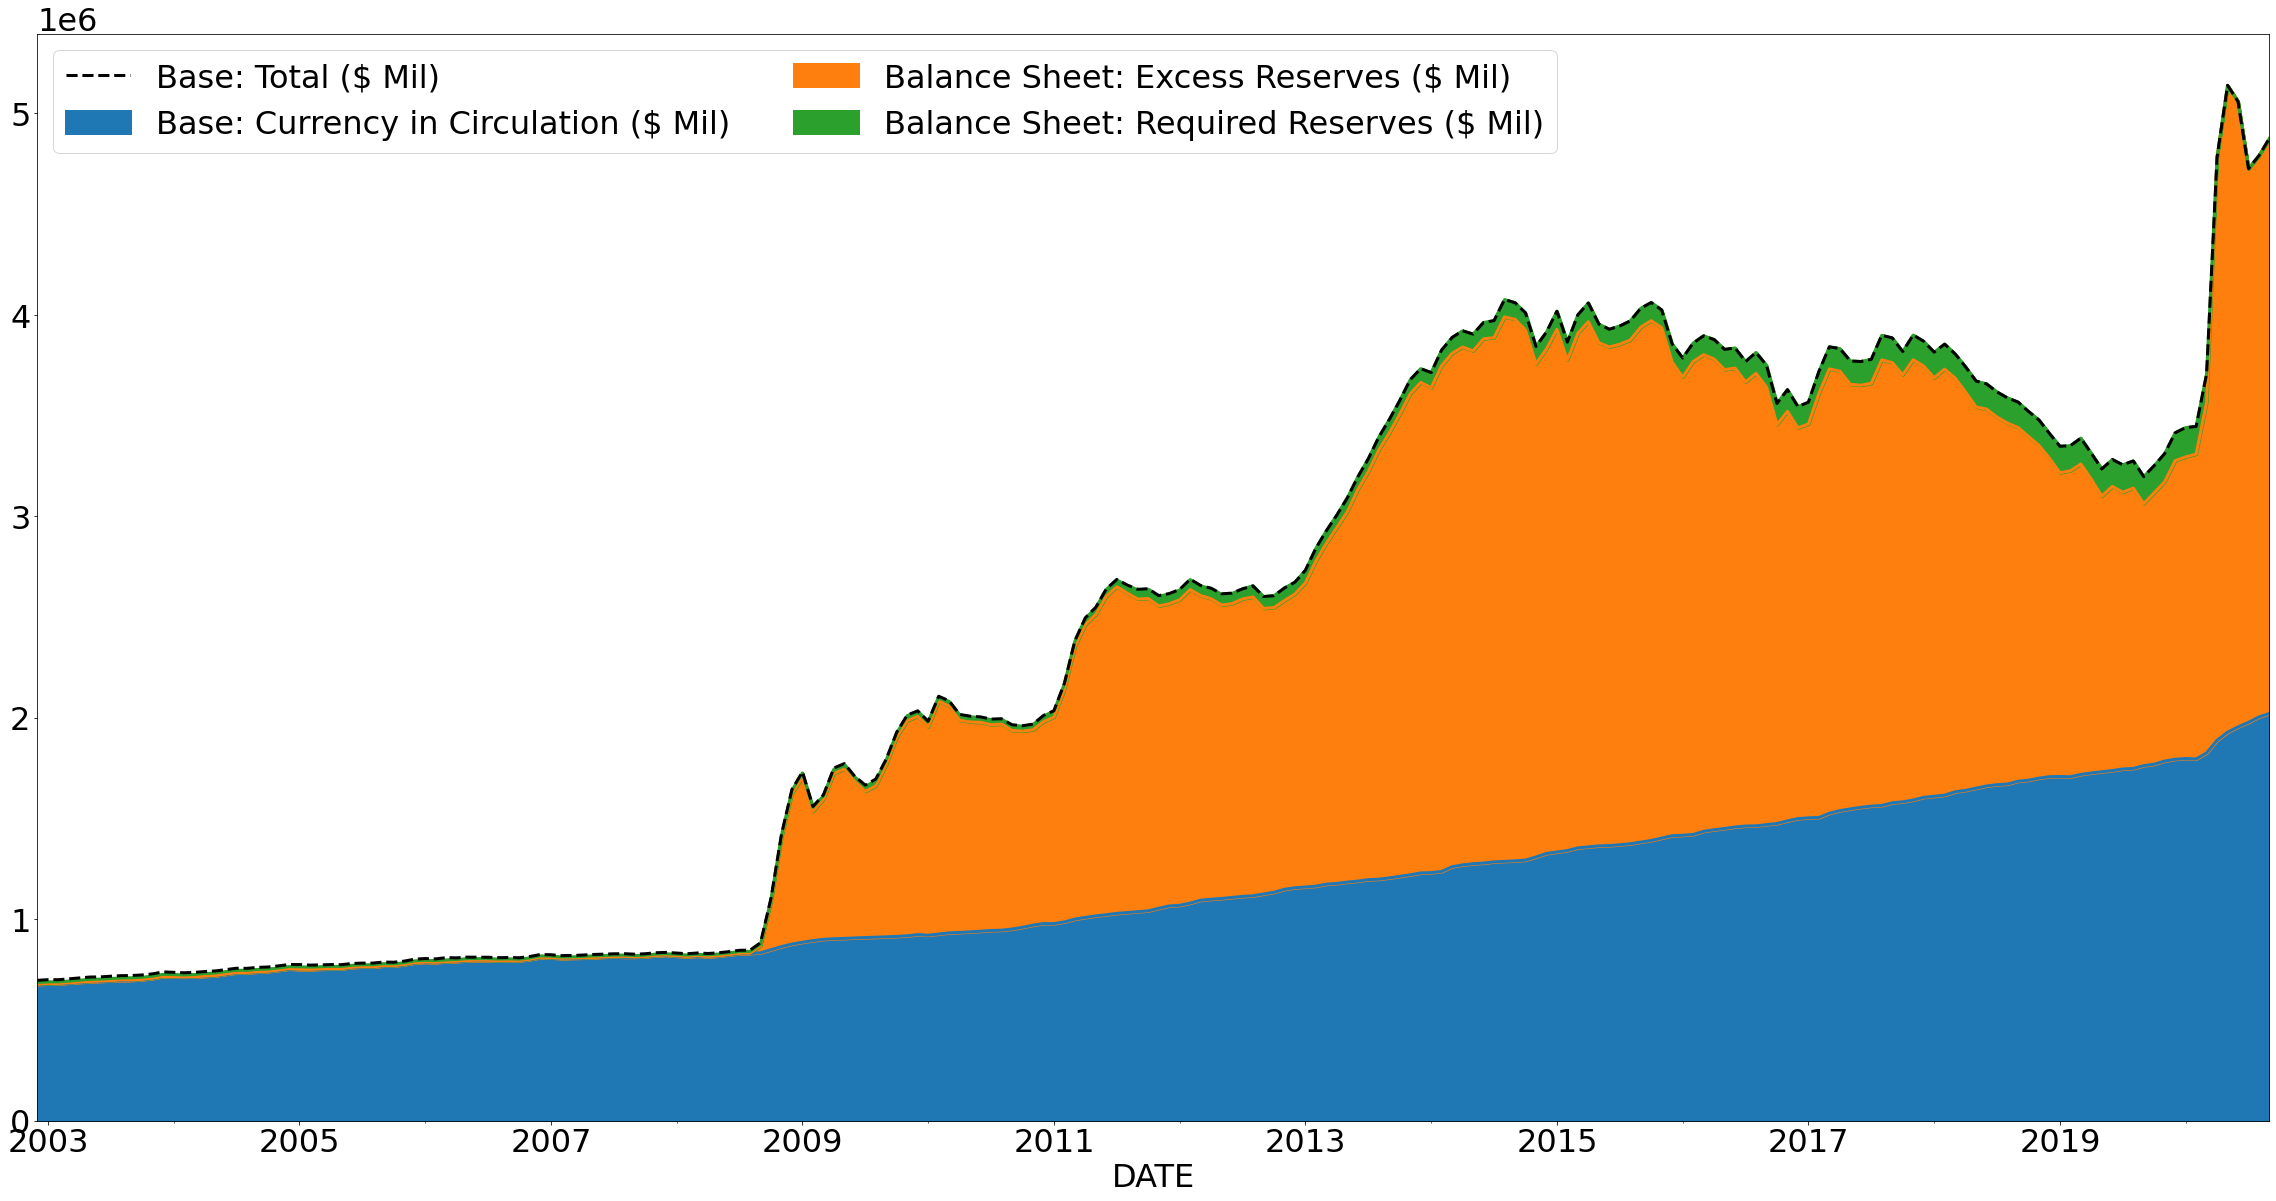

In [15]:
#fedProject.py
# for stacked plot, money_vars selects the vars whose areas we will plot

money_vars = ["Base: Currency in Circulation ($ Mil)",
              "Balance Sheet: Excess Reserves ($ Mil)",
             "Balance Sheet: Required Reserves ($ Mil)"]

plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

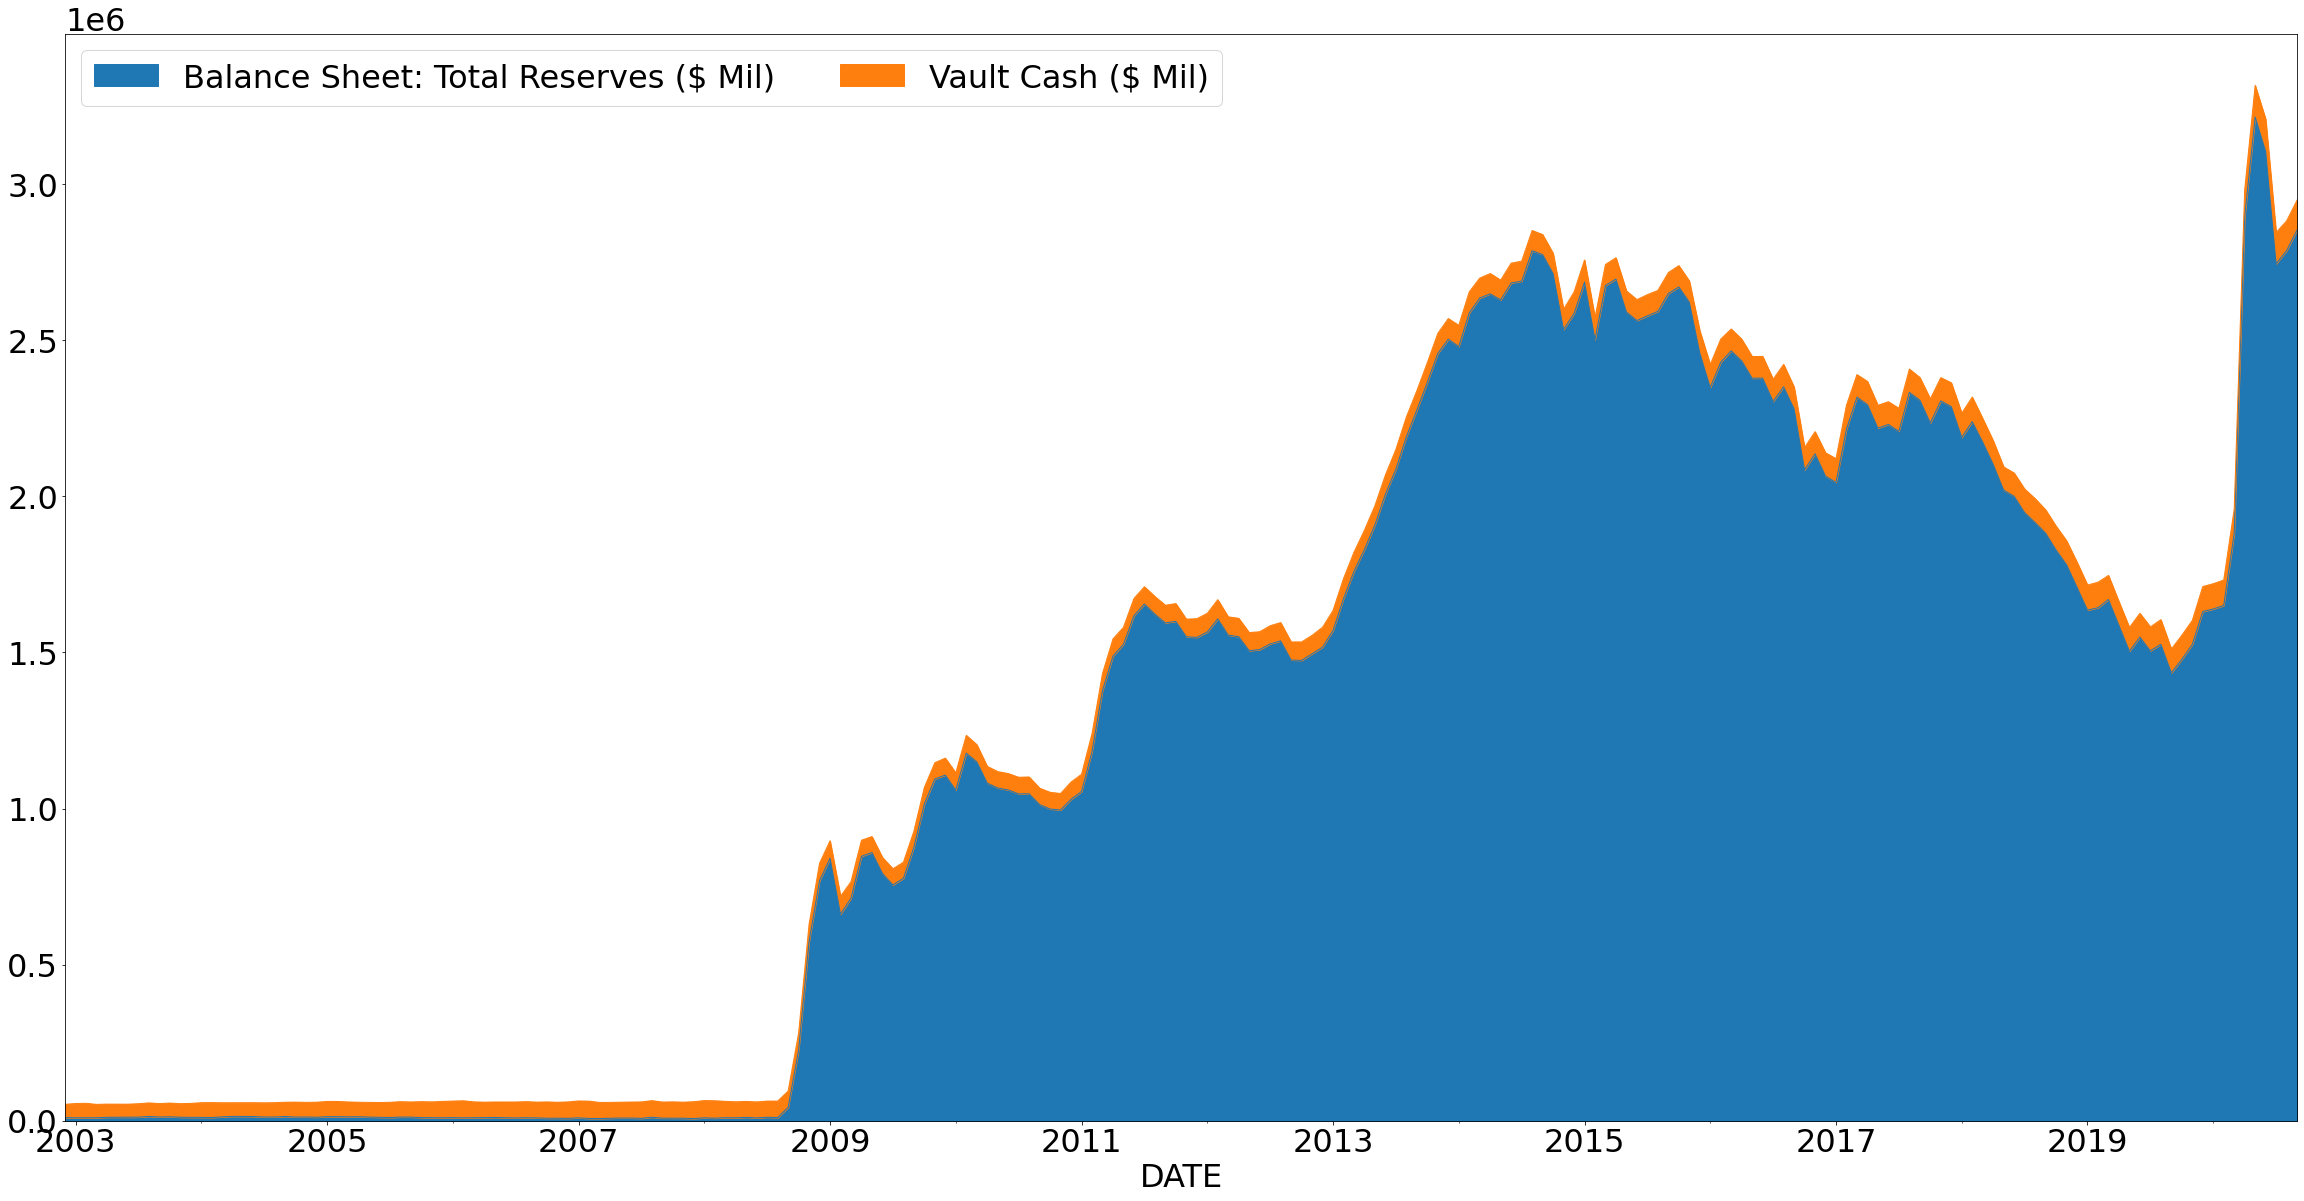

In [16]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Vault Cash ($ Mil)"]
plot_stacked_lines(data, reserve_vars)

Next, let's distinguish between not only excess and required reserves, but also between reserves held at the Fed and reserves held as vault cash.

Required + excess = total, so we can derive excess from knowing Required and Total Reserves

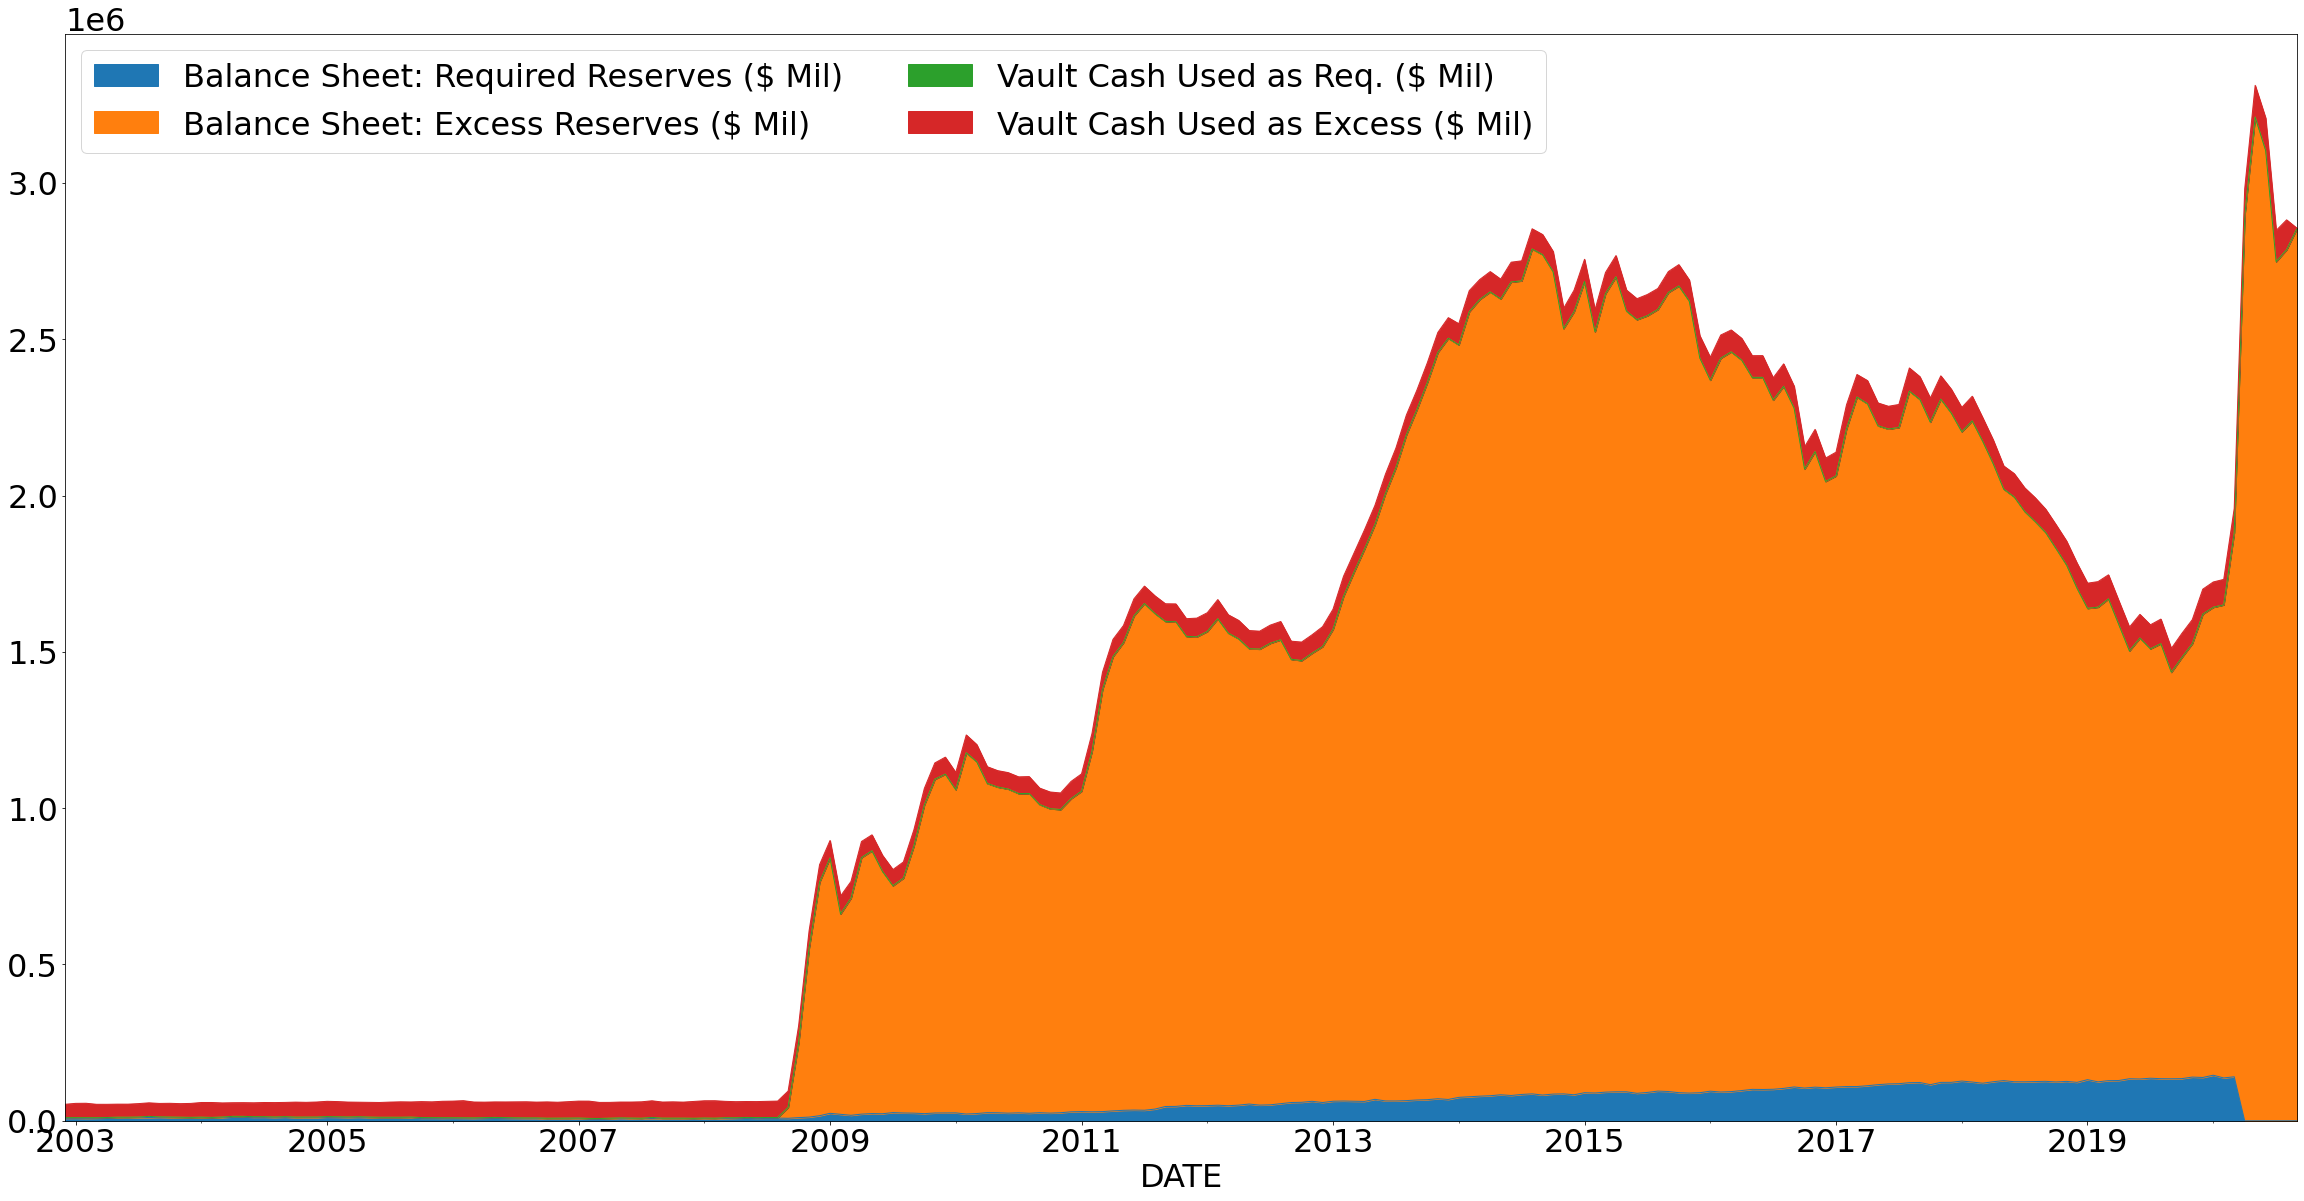

In [17]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])

reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)",
               "Balance Sheet: Excess Reserves ($ Mil)",
               "Vault Cash Used as Req. ($ Mil)",
                "Vault Cash Used as Excess ($ Mil)"]

plot_stacked_lines(data, reserve_vars)

## Assets Held by the Federal Reserve

Next, we can plot the composition of the Federal Reserve balance sheet. The balance sheet is split between assets and liabilities. First, we will consider the Fed's assets.

When the fed purchases debt (securities from the gov), it's provide funds that promote lending. This has a similar effect as if the Fed actually lent. 

Securities are promises to repay by the borrower to the holder of the security.

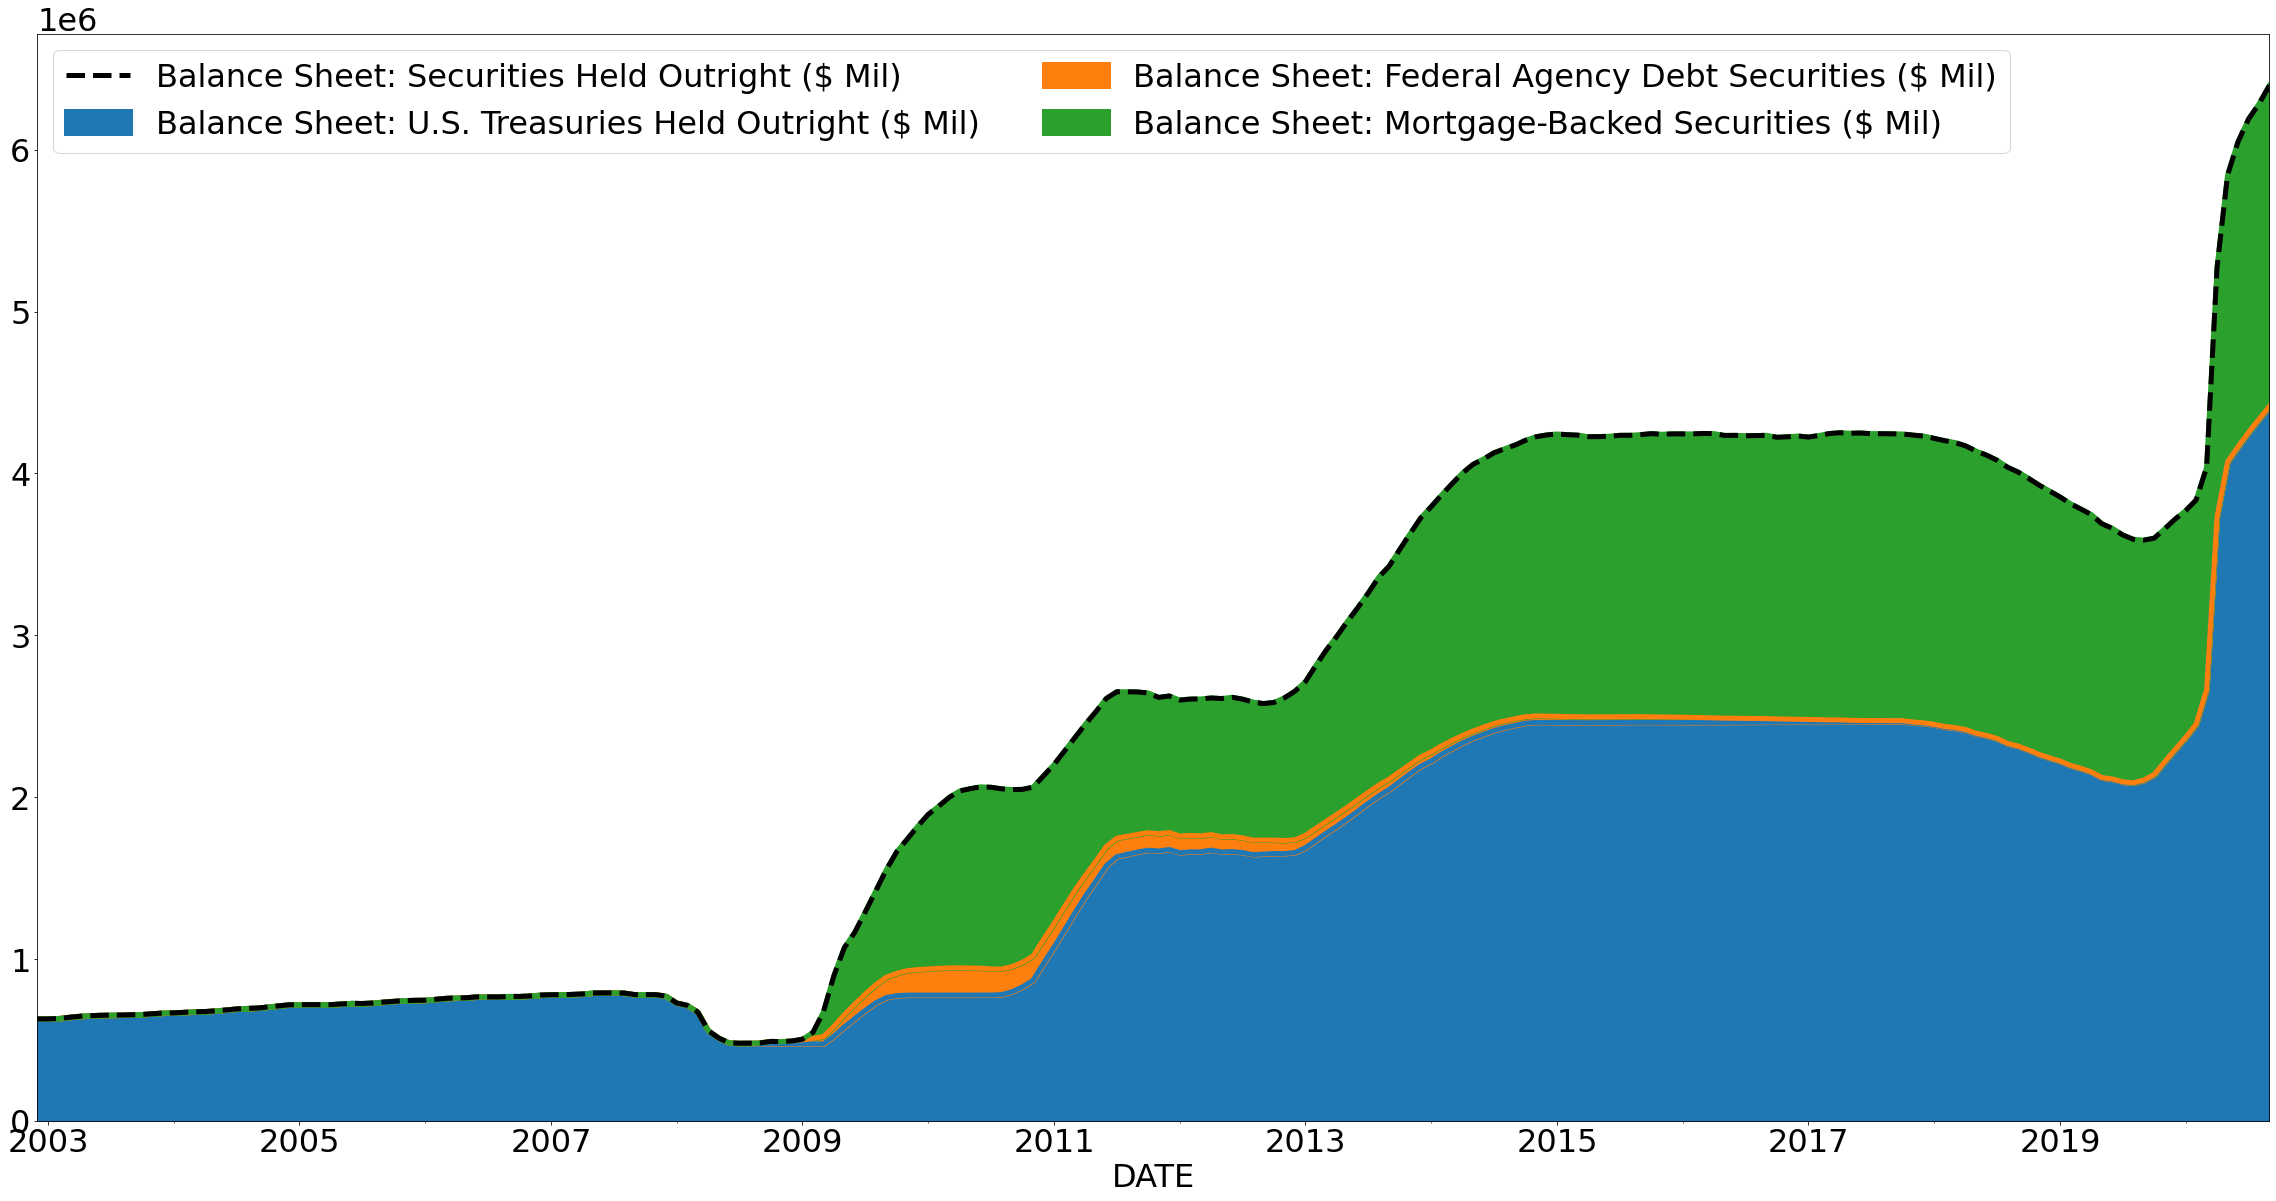

In [18]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
                   "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
                   "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 5,
                  total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

For a long time, the Fed was invested in securities. But in 2008, the Fed changed to purchasing mortages as securities. Now the Fed owns close to 20% of the mortgages. 

In regards to COVID-19, the government picked up spending to support the economy via Keynsian economic theory. This is the hike you can see in what is the 2020 part of the graph. This graph is only graphing securities, so looking at other parts of the balance sheet may be useful.

C:\Users\gwens\611\611_Chapter_4\datlib\plots.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"]=[int(str(ind)[:4])for ind in df.index]


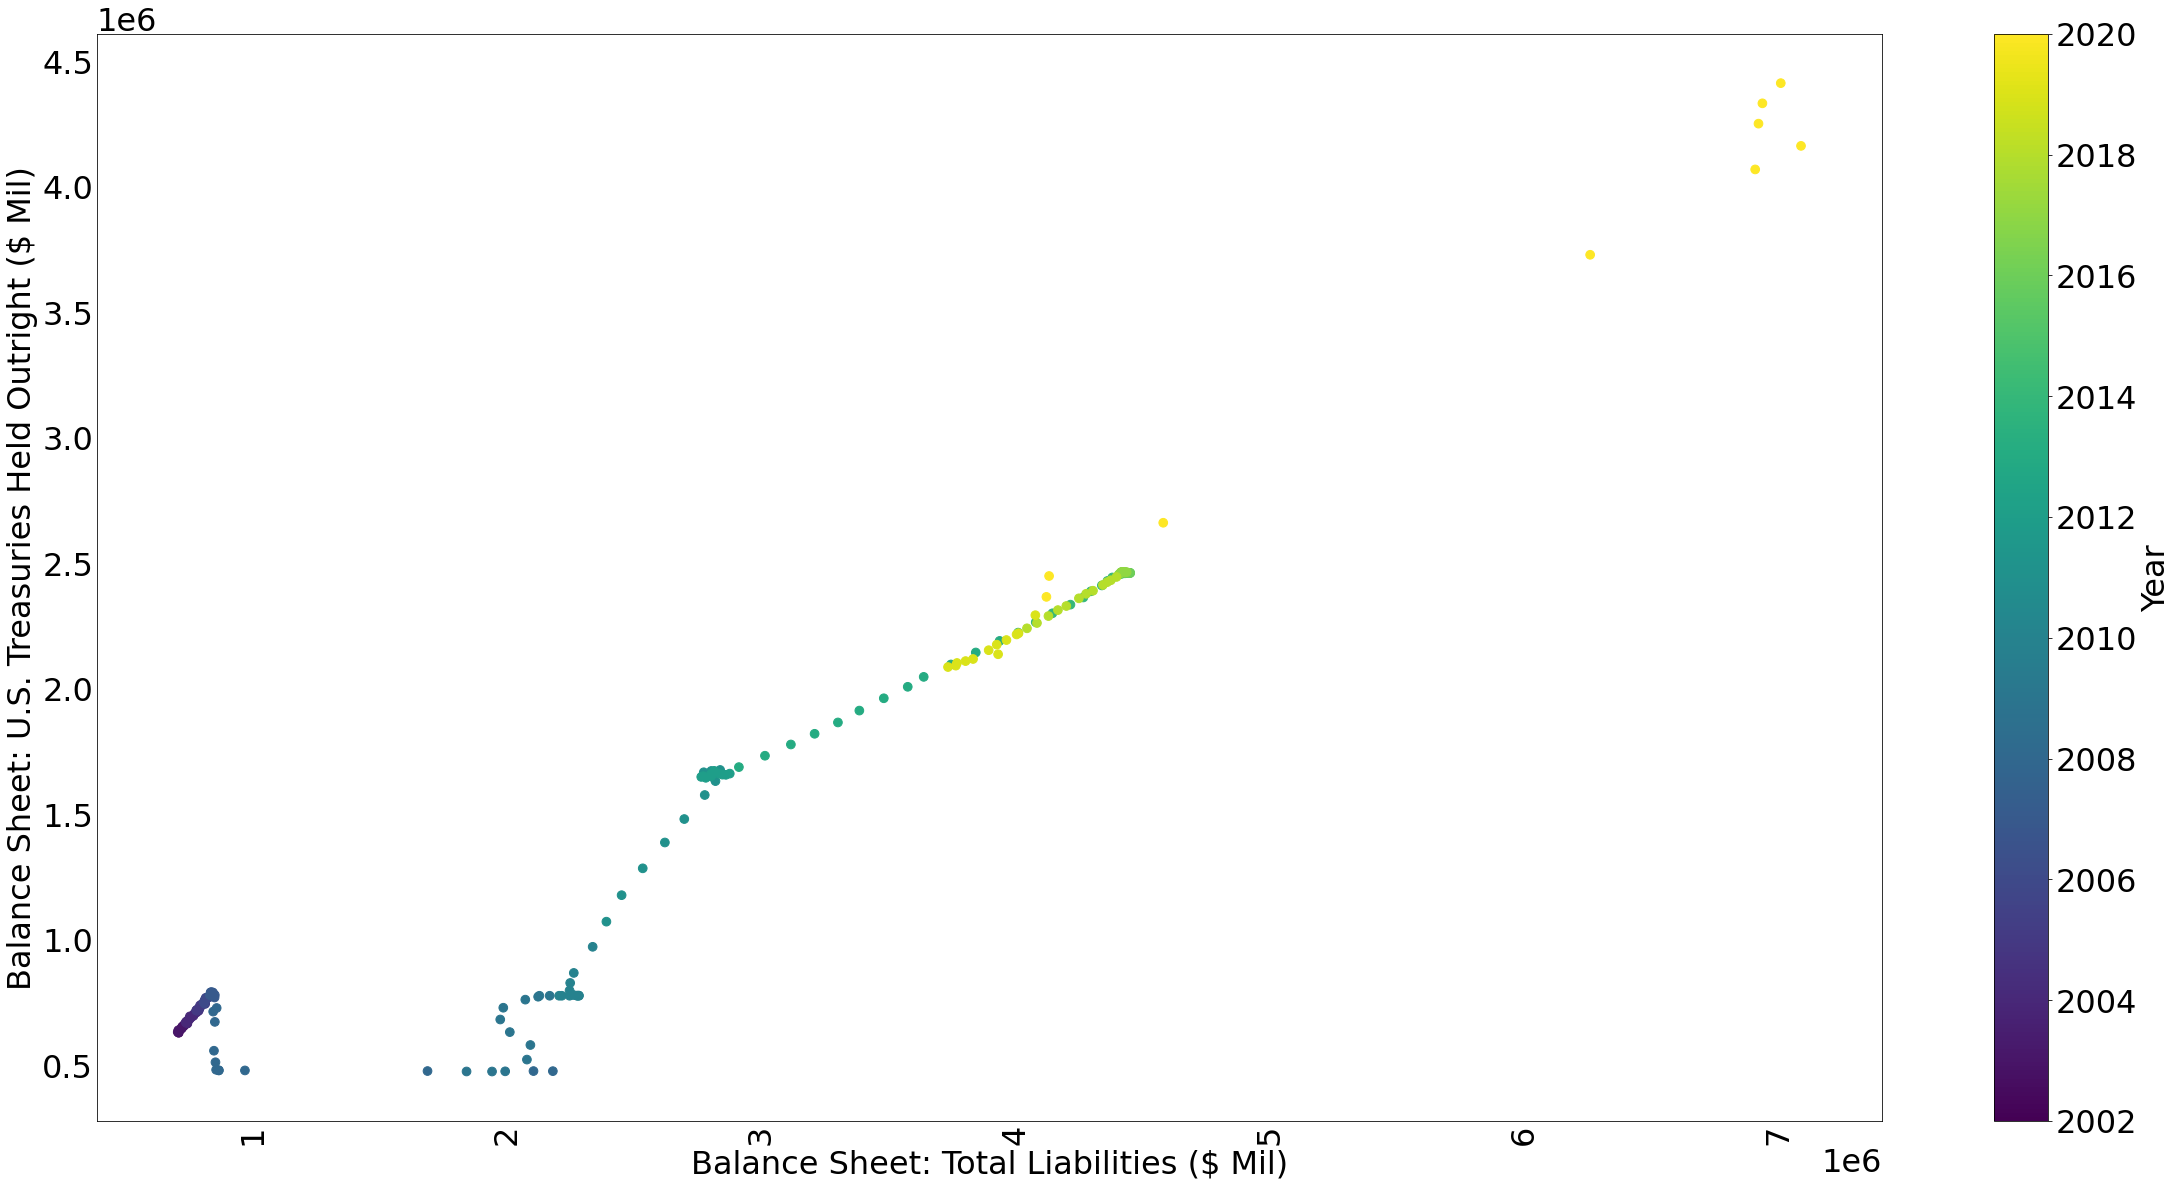

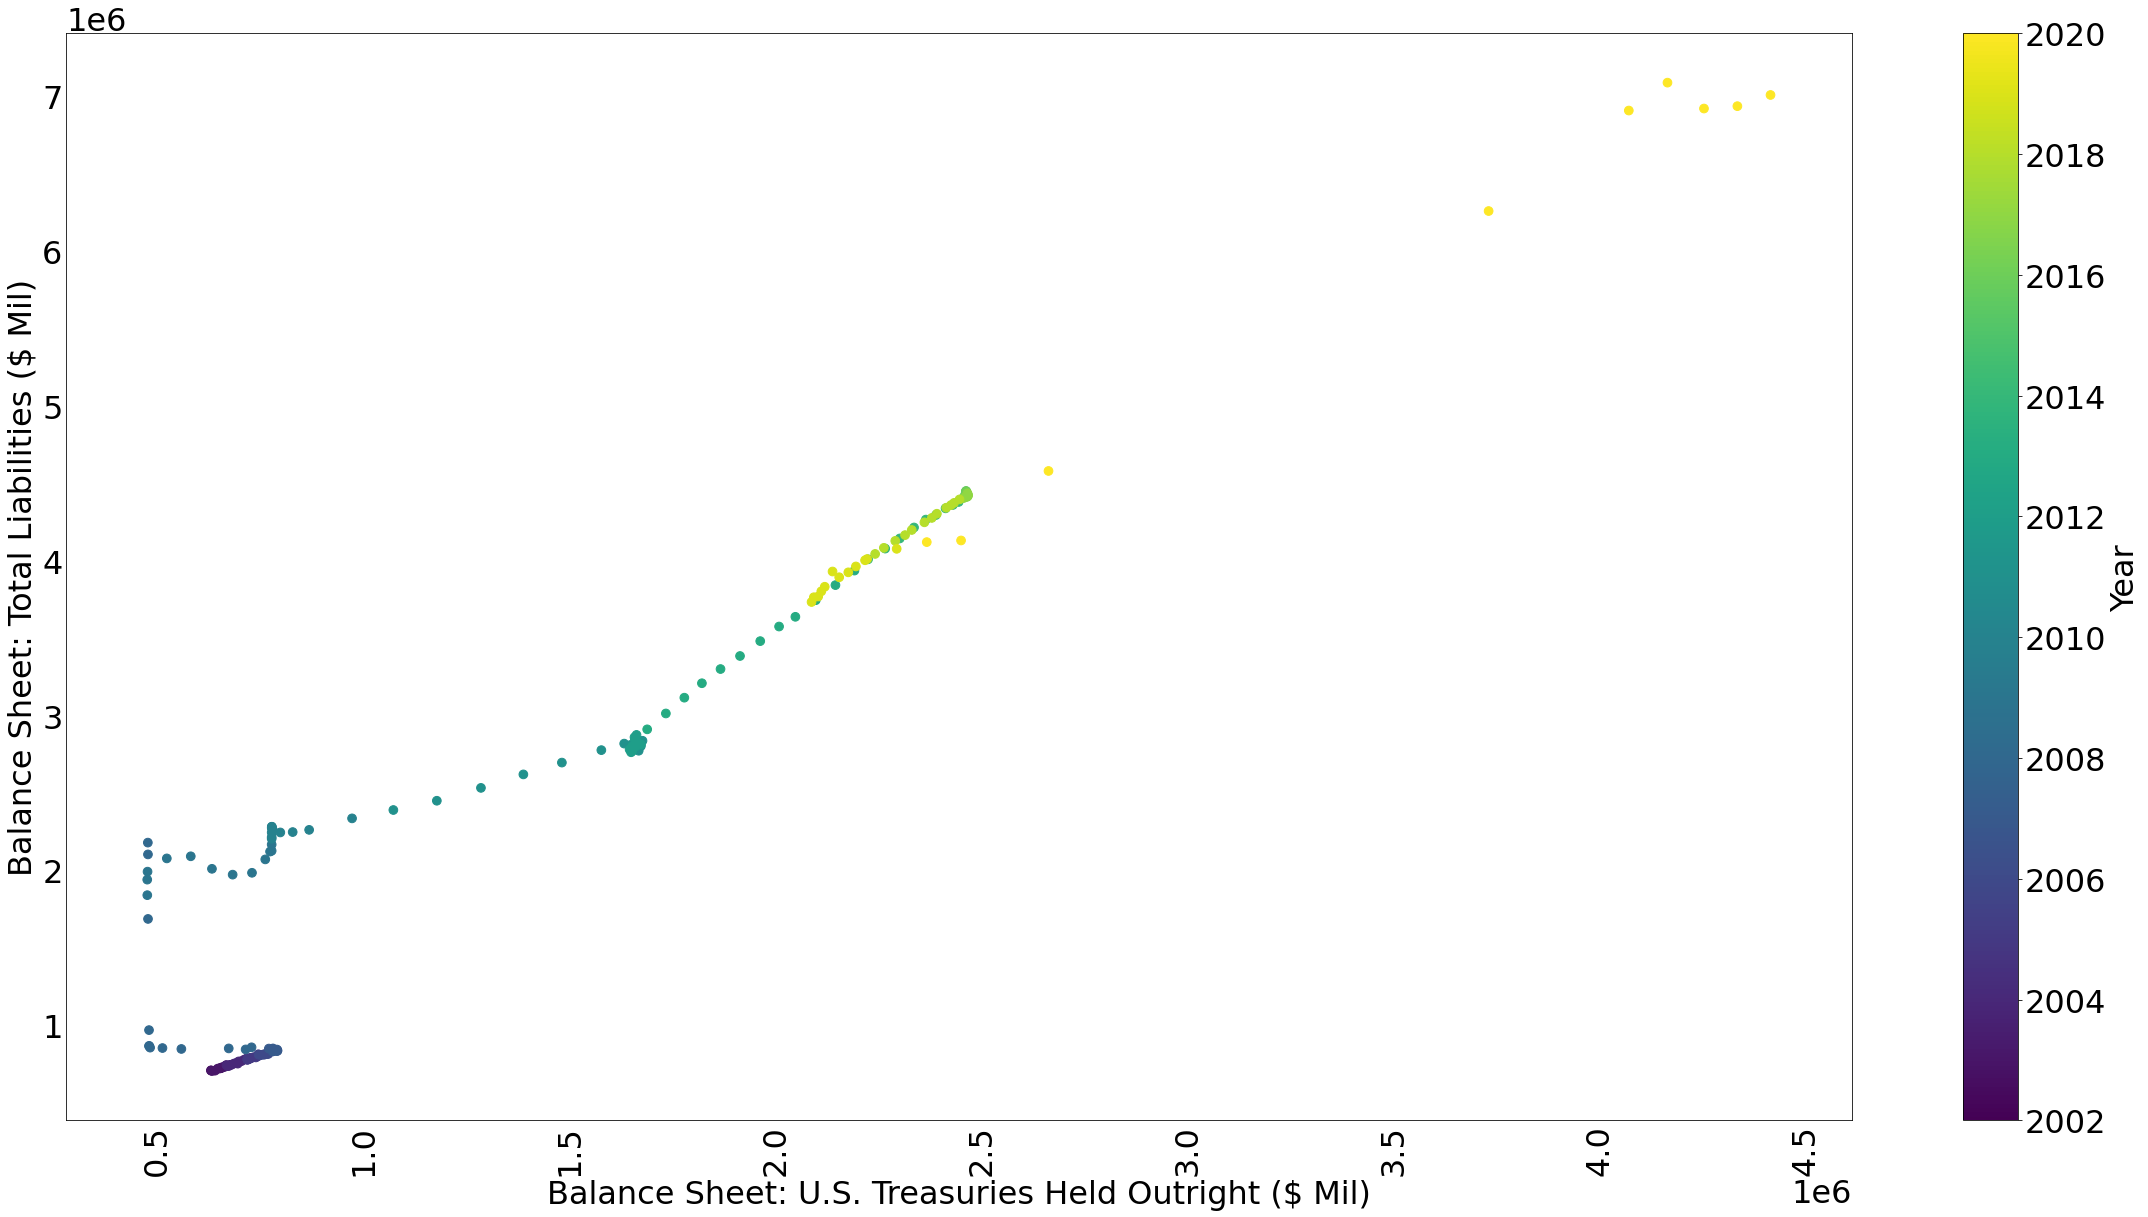

In [19]:
#This is just another way of visualizing the same data.

scatter_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]
plot_ts_scatter(data[scatter_vars])

Next, we will plot the remainder of the Fed's assets as reflected in its balance sheet

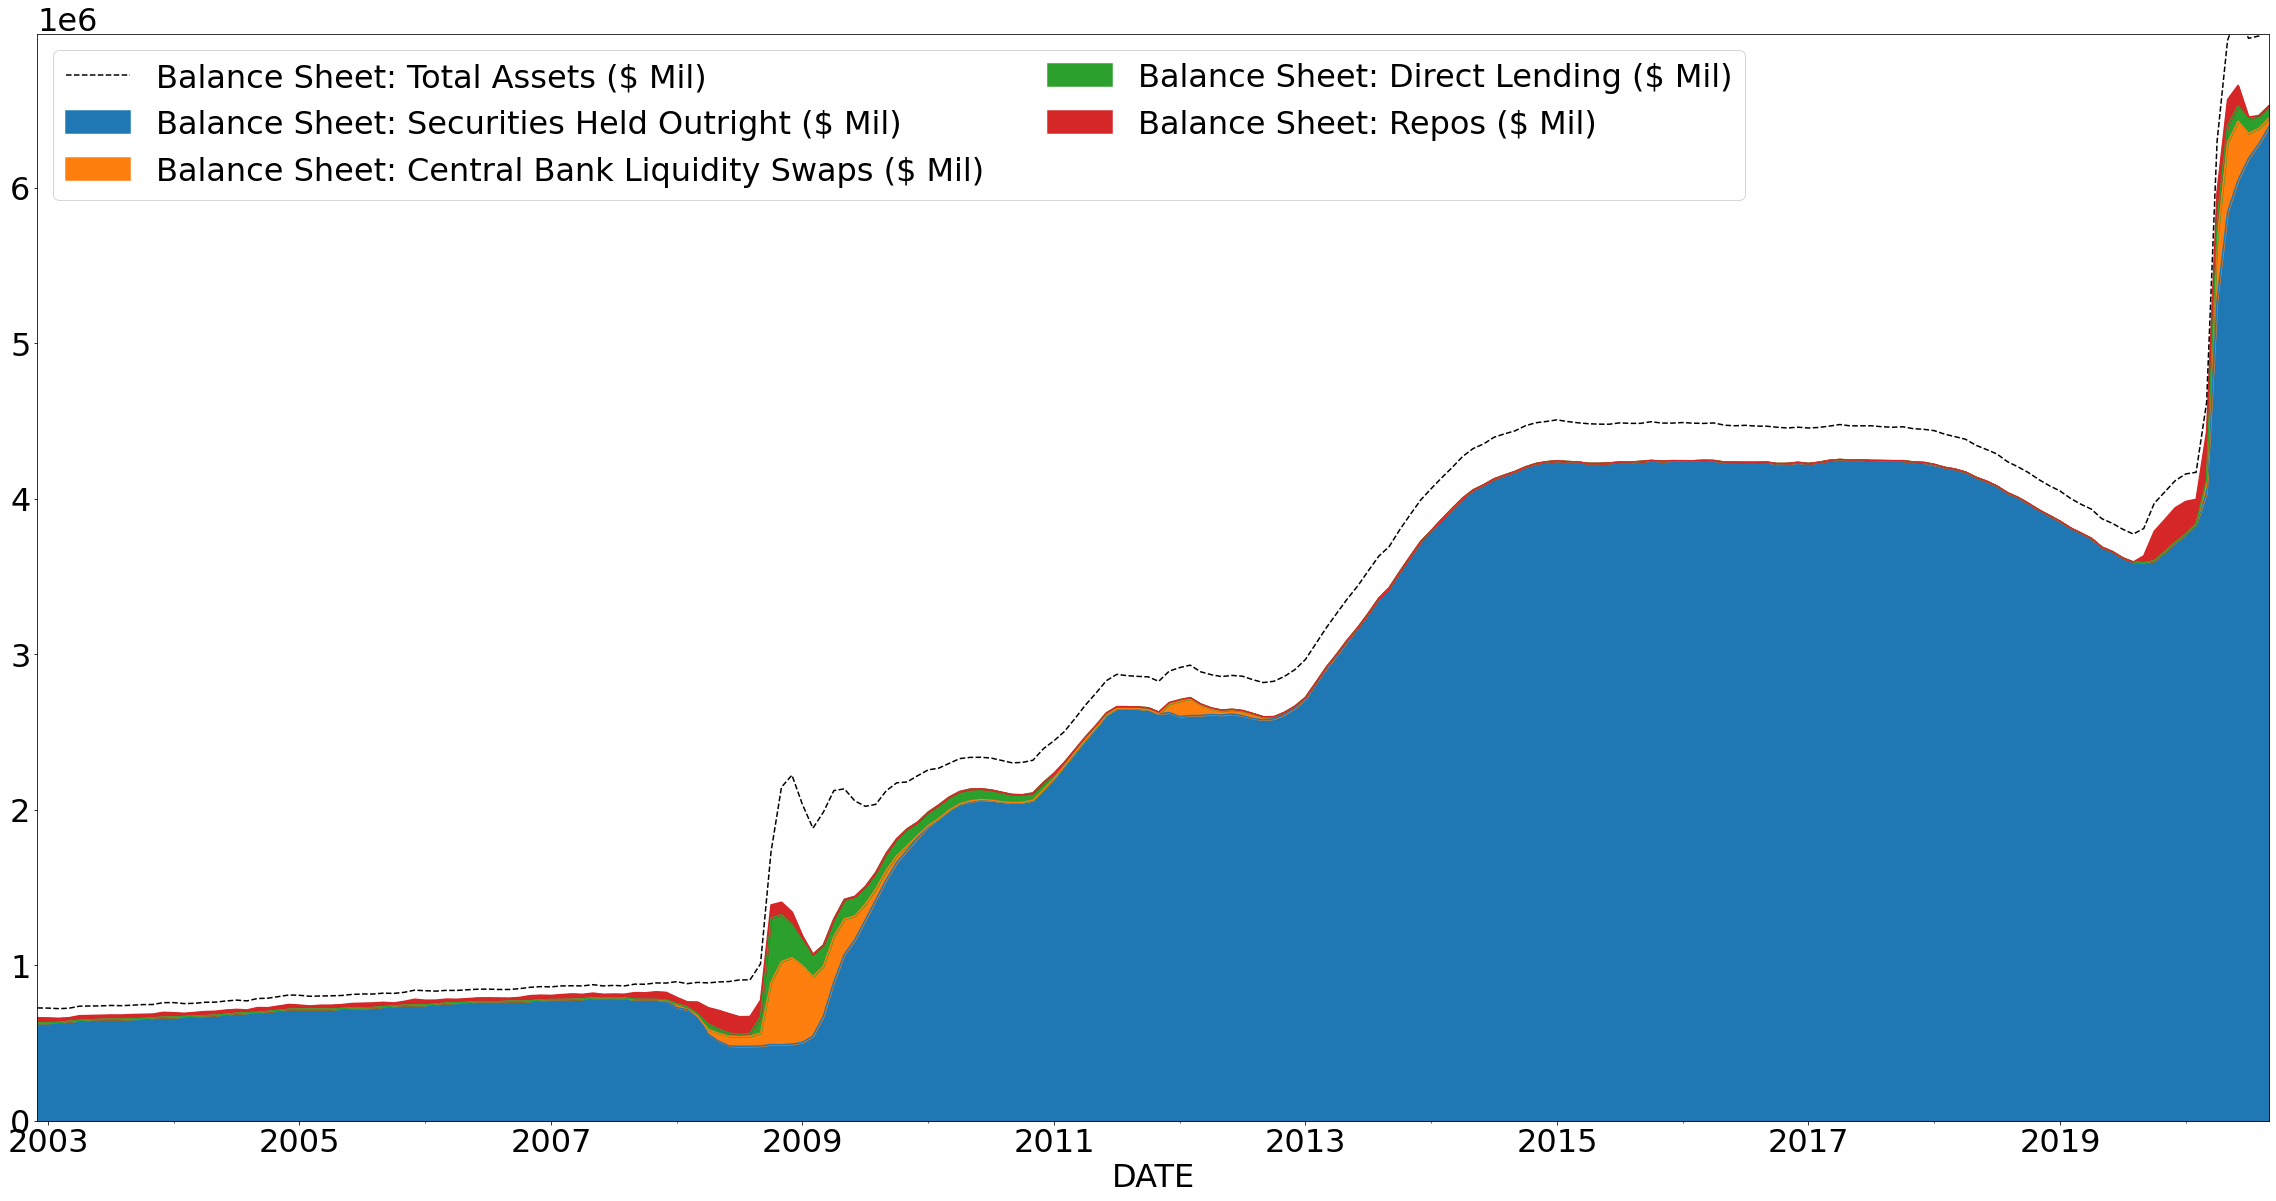

In [20]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")

you can see periods where securities held are not the primary means of monetary policy. So in the idea that the dollar is the world's reserve currency, central bankes around the world hold dollars during times of crisis. The Fed engaged in "direct lending" during these times to in order to try stabilize during crisis times. The Fed provides loans to lend direct, or it buys loans to also lend. Every one of these categories is a direct loan, or the purchase of an asset that supports borrowing.

Predominantly, the Fed purchases securities. The small gap under the dotted line shows what portion of the balance sheet is not represented by the variables displayed so far.

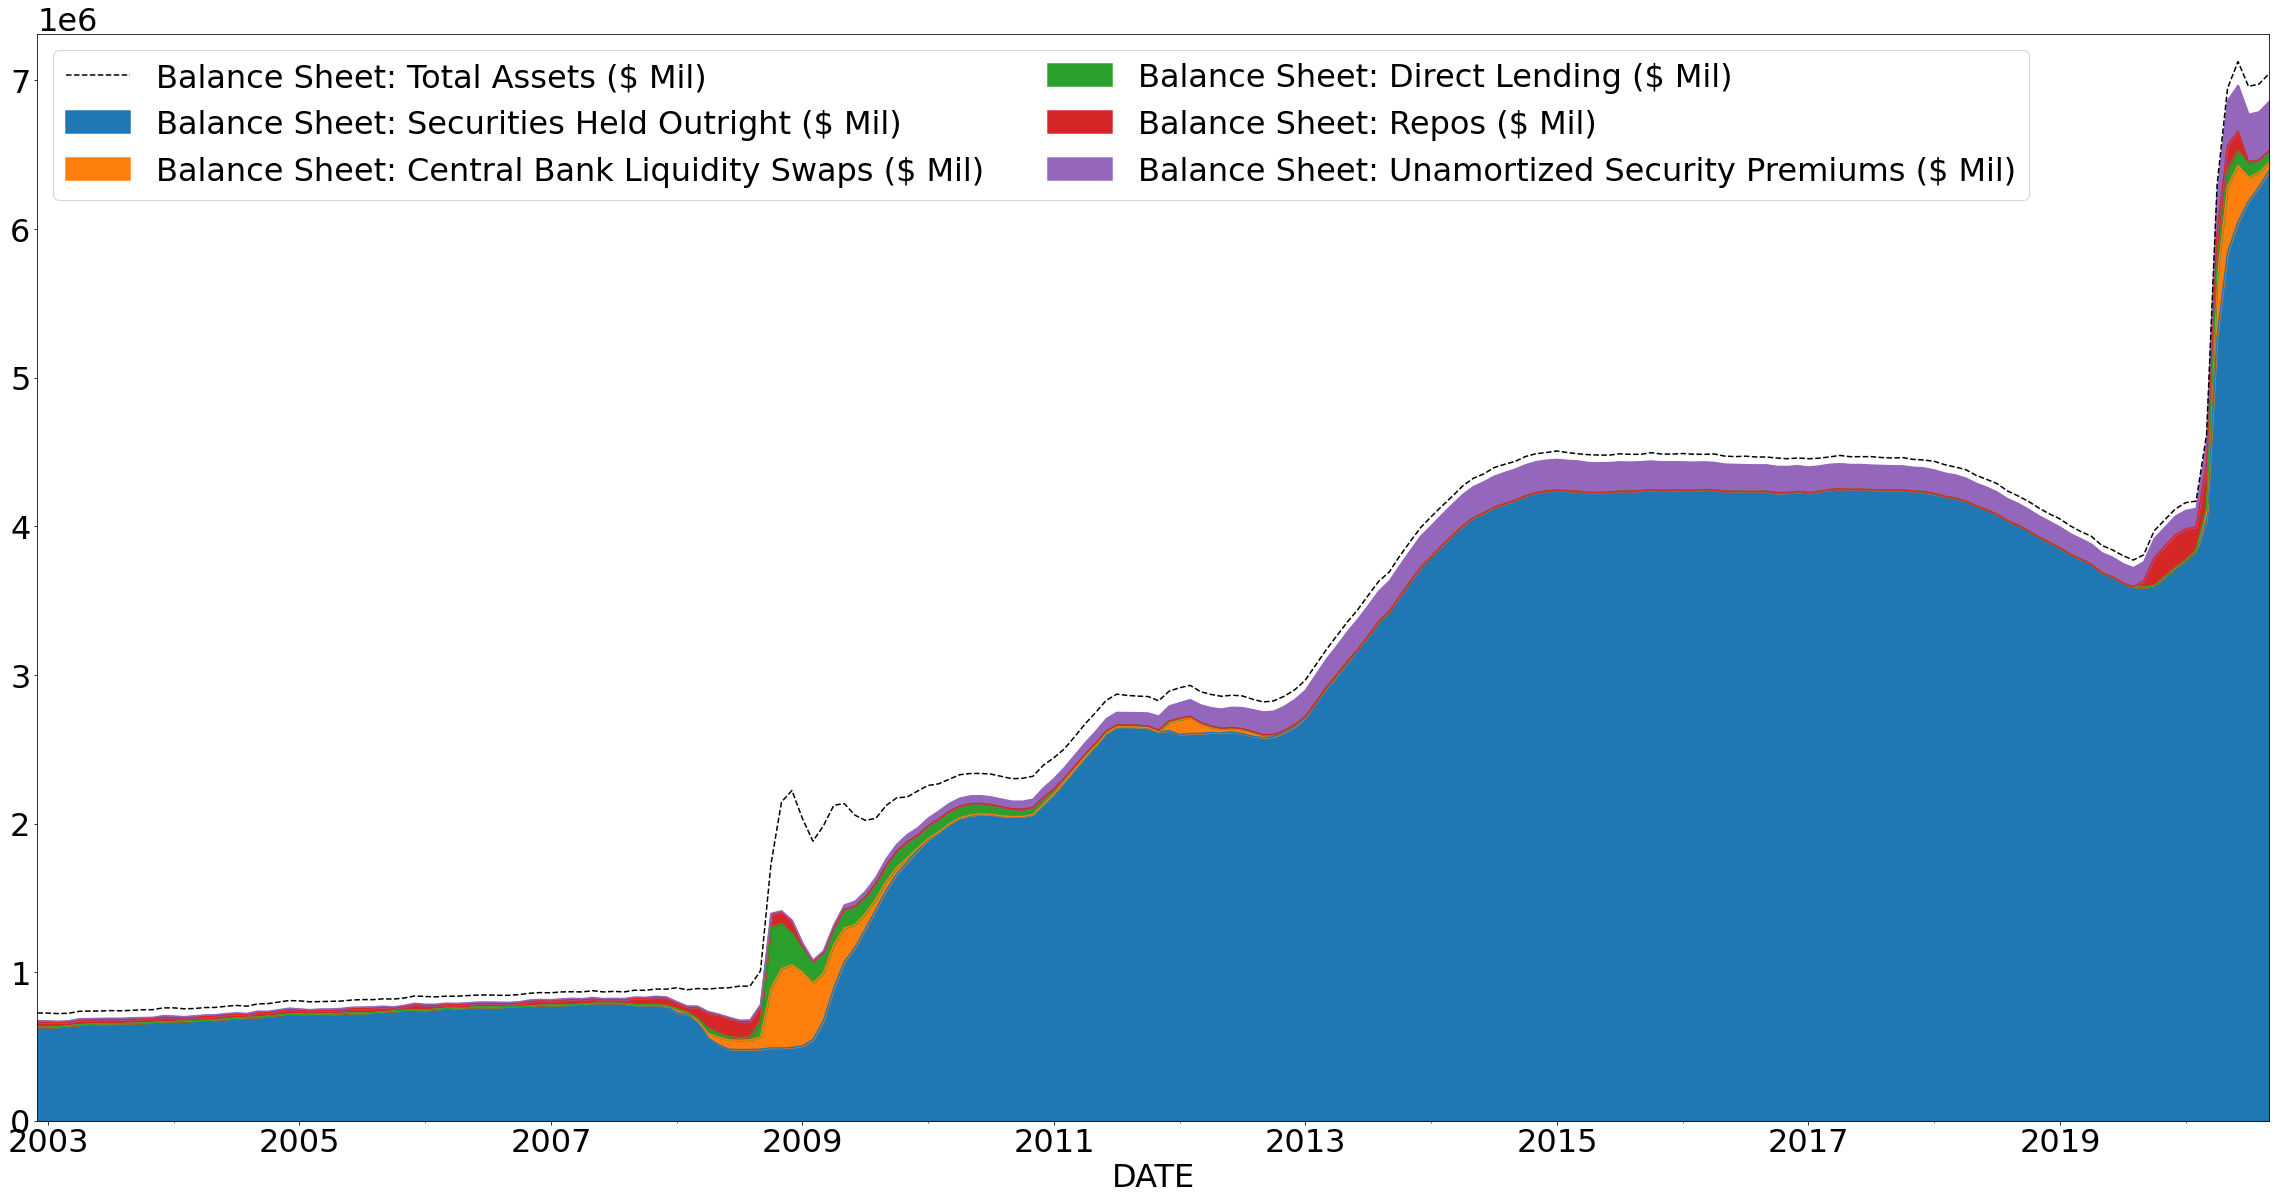

In [21]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, total_var = "Balance Sheet: Total Assets ($ Mil)")

Except for during 2008/9, the asset side of the balance sheet is made up the variables shown in the above graph. Next, we can study liabilities. 

## Liabilities of the Federal Reserve

Next we will plot the liabilities side of the Fed's balance sheet. This includes all federal reserve notes and deposit accounts at the Fed.

Liability examples:
>parties that hold excess reserves at the bank and the risk-free interest rate paid on that, these are bodies of financial institutions
>US Treasury General Account (the deposit held at the Fed to act as the monetary base along with excess reserves and currency in circulation)

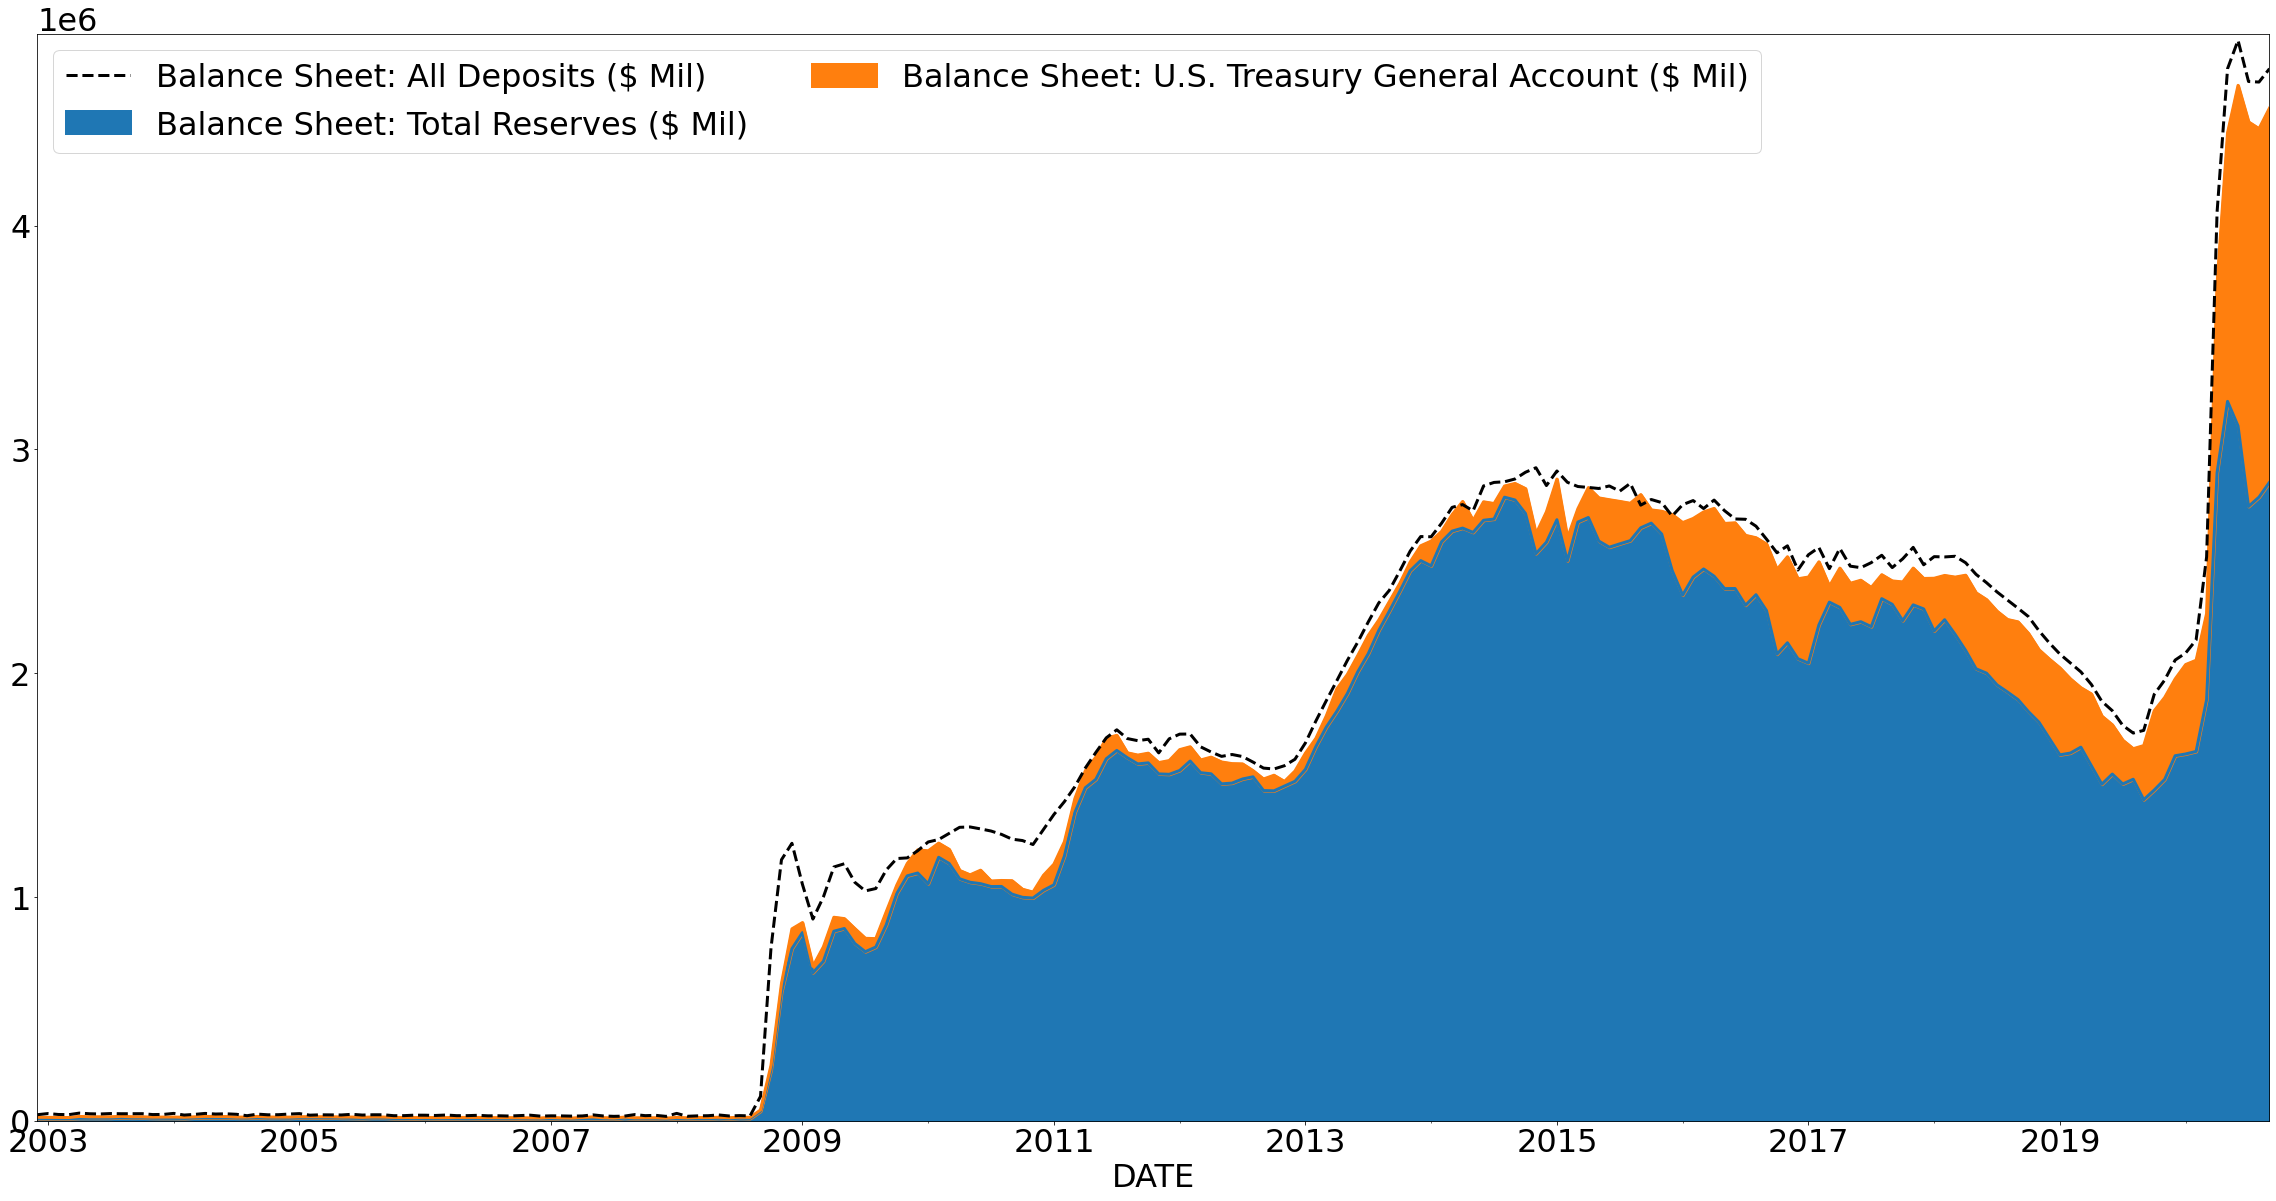

In [22]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: All Deposits ($ Mil)")

The Fed pays interest on excess reserves held at the Fed to keep a portion of the monetary base out of circulation. Banks take advantage of the risk free return. The graph above shows the reserves held at the Fed and Fed reserve notes outside of the federal resrve. You can see that the solid parts that account for these almost fill up to the dotted monetary base line.

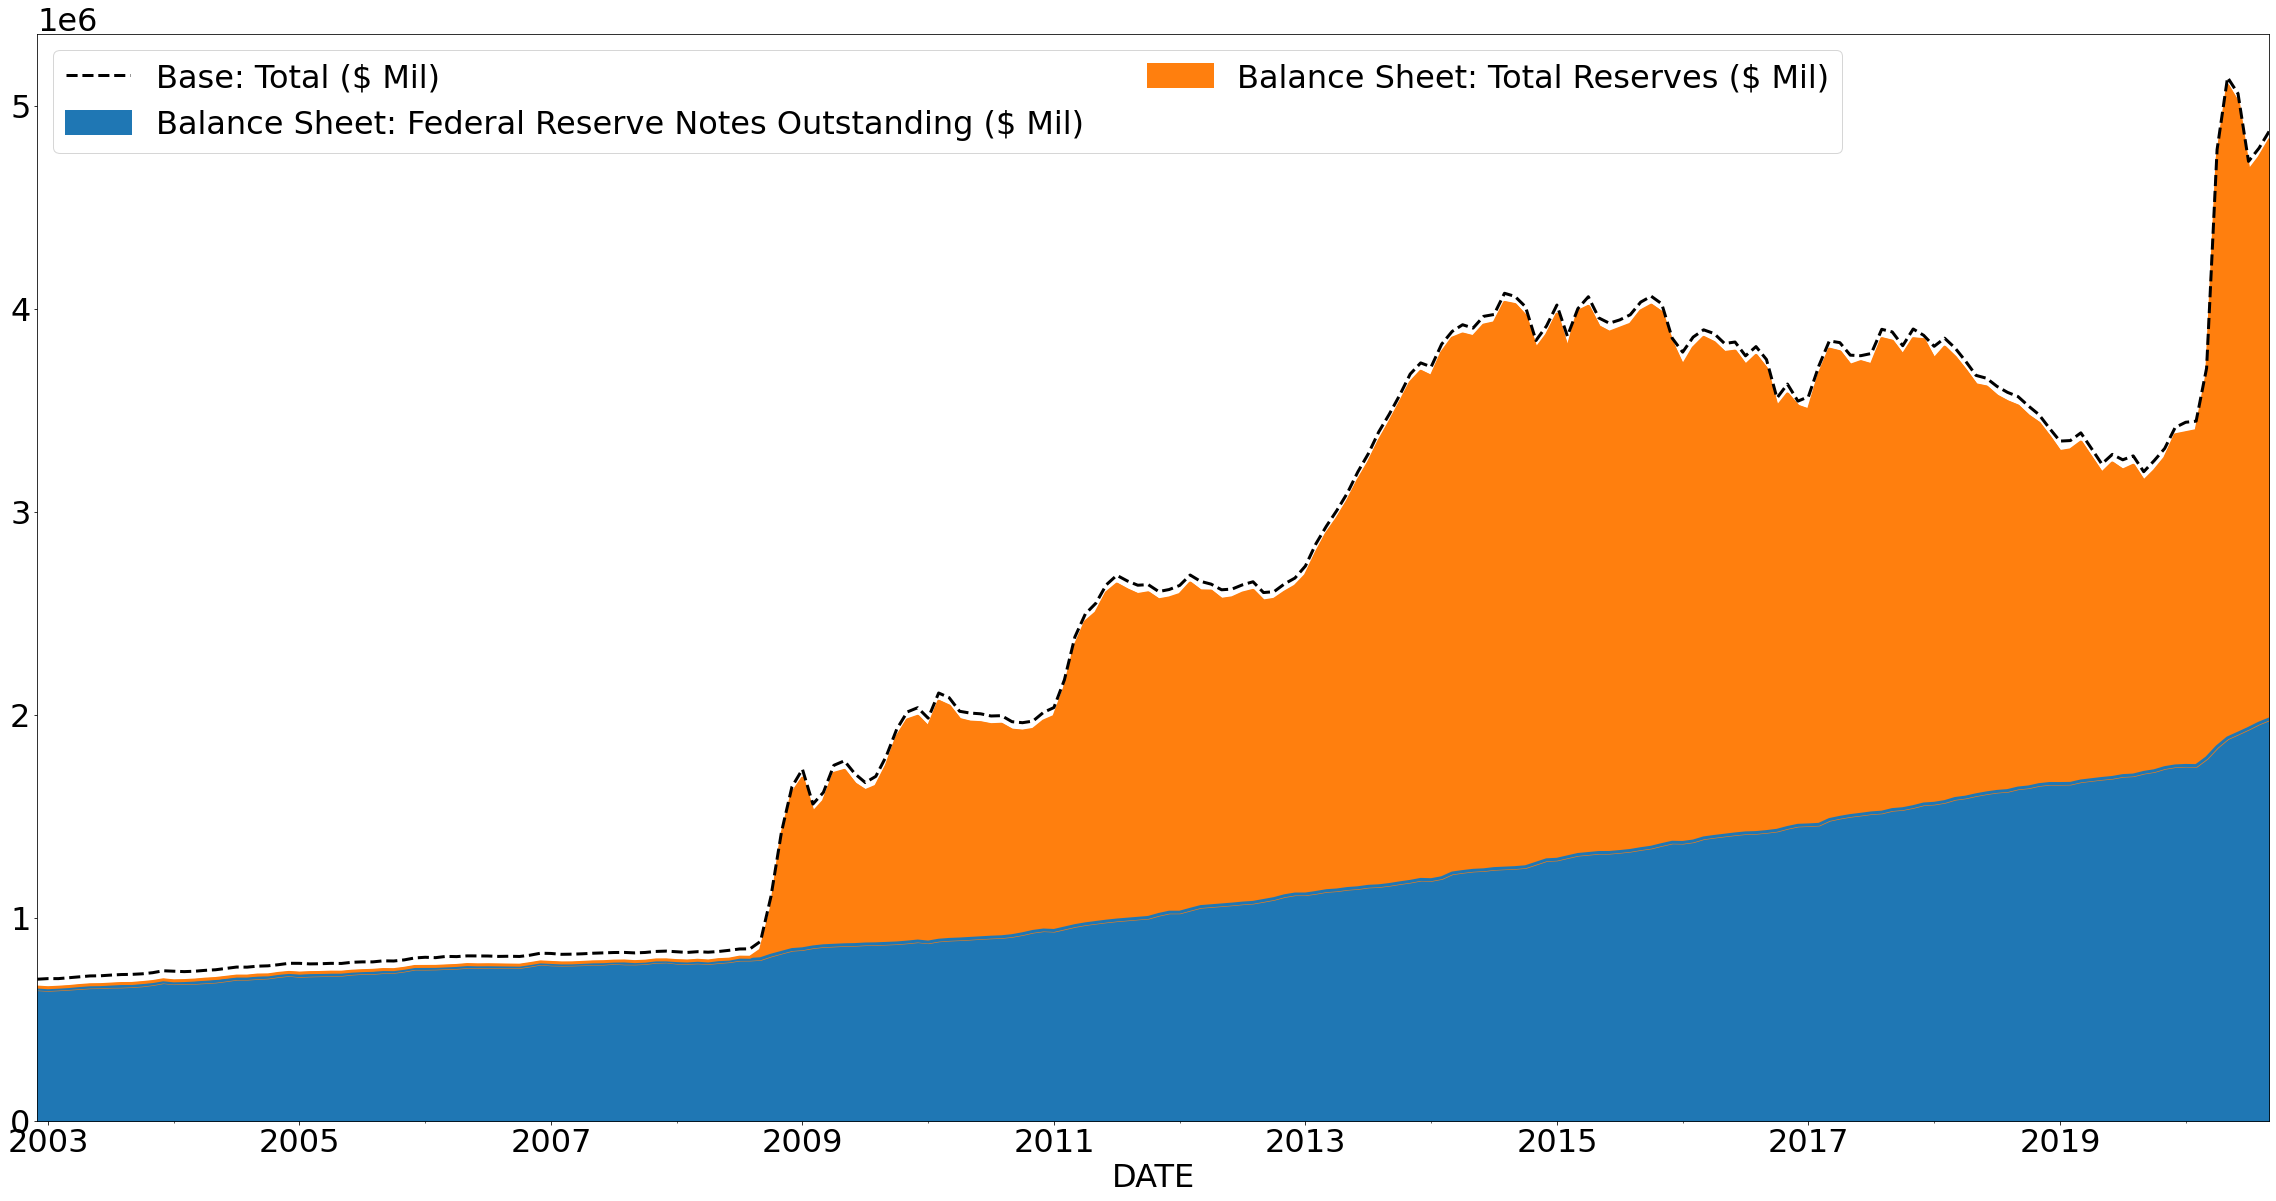

In [23]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
               "Balance Sheet: Total Reserves ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

The deposits being held at the Fed come from financial institutions and the federal government. Since 2008 and again with the COVID19 crisis, the Fed has performed the creation of money and removing is from circulation so as to prevent inflation. It was thought that hyperinflation would happen, but all of the orange from the above graph above is money that was removed to prevent that. The orange slice in 2020 in the above graph is an implicit tax that we're paying to support the government.

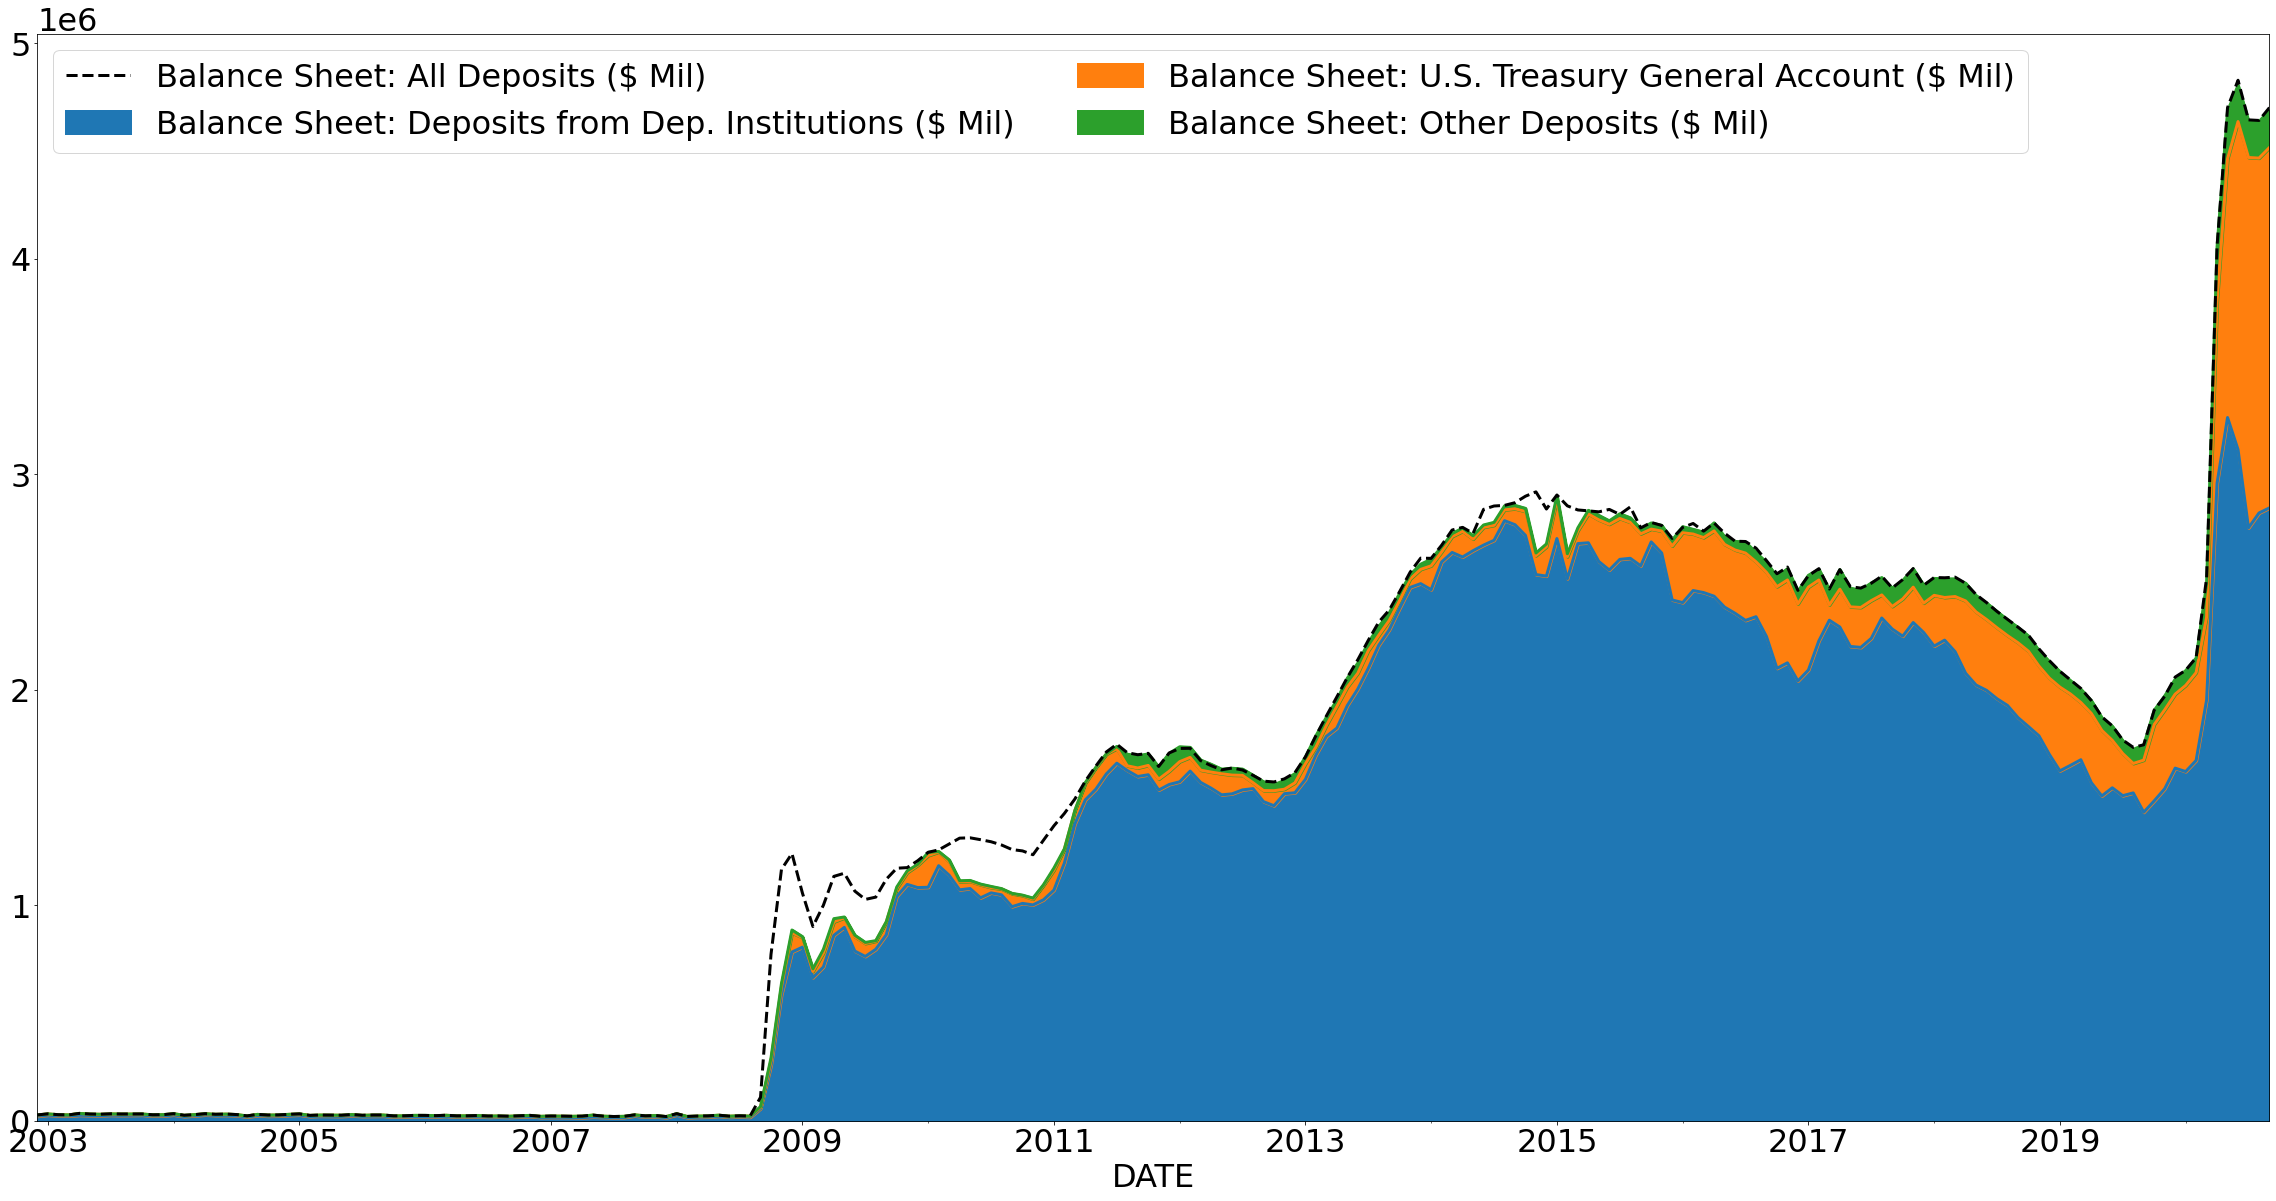

In [24]:
account_vars = ["Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)",
               "Balance Sheet: Other Deposits ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: All Deposits ($ Mil)")

The graph above demonstrates the portion of the Fed's liabilities accounted for by the U.S. treasury account, deposits from other banks, and other deposits.

Finally let's divide liabilities between Federal Reserve Notes Outstanding, Deposits, and Reverse Repos. The last category, reverse repos, represents the Fed borrowing from the overnight lending market.

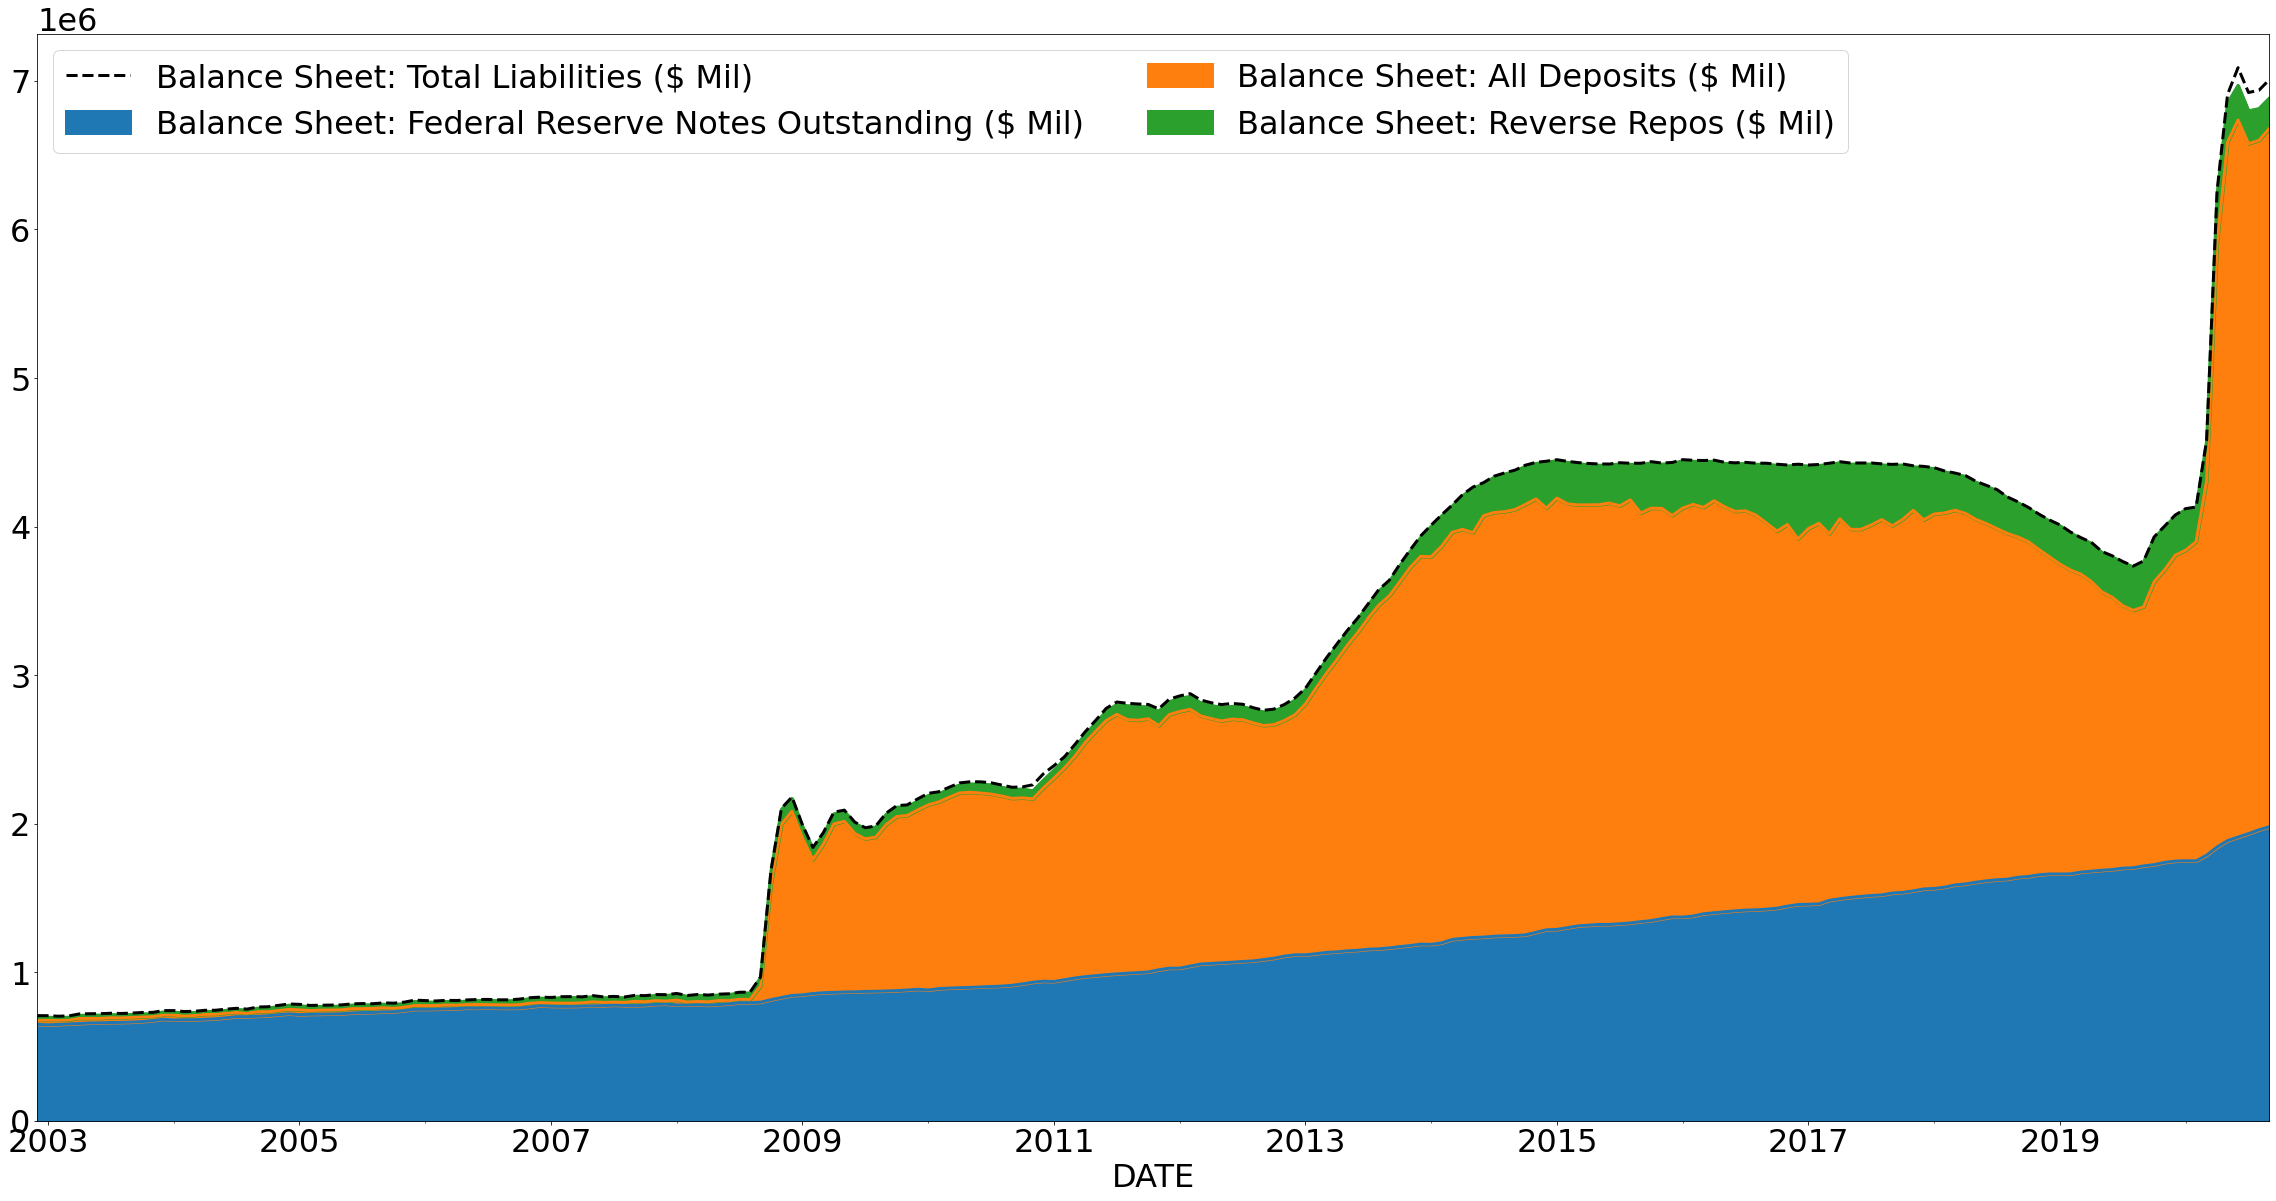

In [25]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
               "Balance Sheet: All Deposits ($ Mil)",
               "Balance Sheet: Reverse Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Balance Sheet: Total Liabilities ($ Mil)")

The blue area is money created that is circulating in the market. The orange is money that is re-deposited in the Fed, the orange section. The green in the money lent to the Fed in the overnight market. The blue section is slightly sloping up signifying the low inflation that we experience as long as everyone believes in the system. We have 4 times the amount of money than what's circulating in the economy.

## Overnight Lending and the Federal Funds Rate

Next, let's show the effects of the Federal Reserve operations in the overnight lending market by neeting out reverse repors from the value of repos

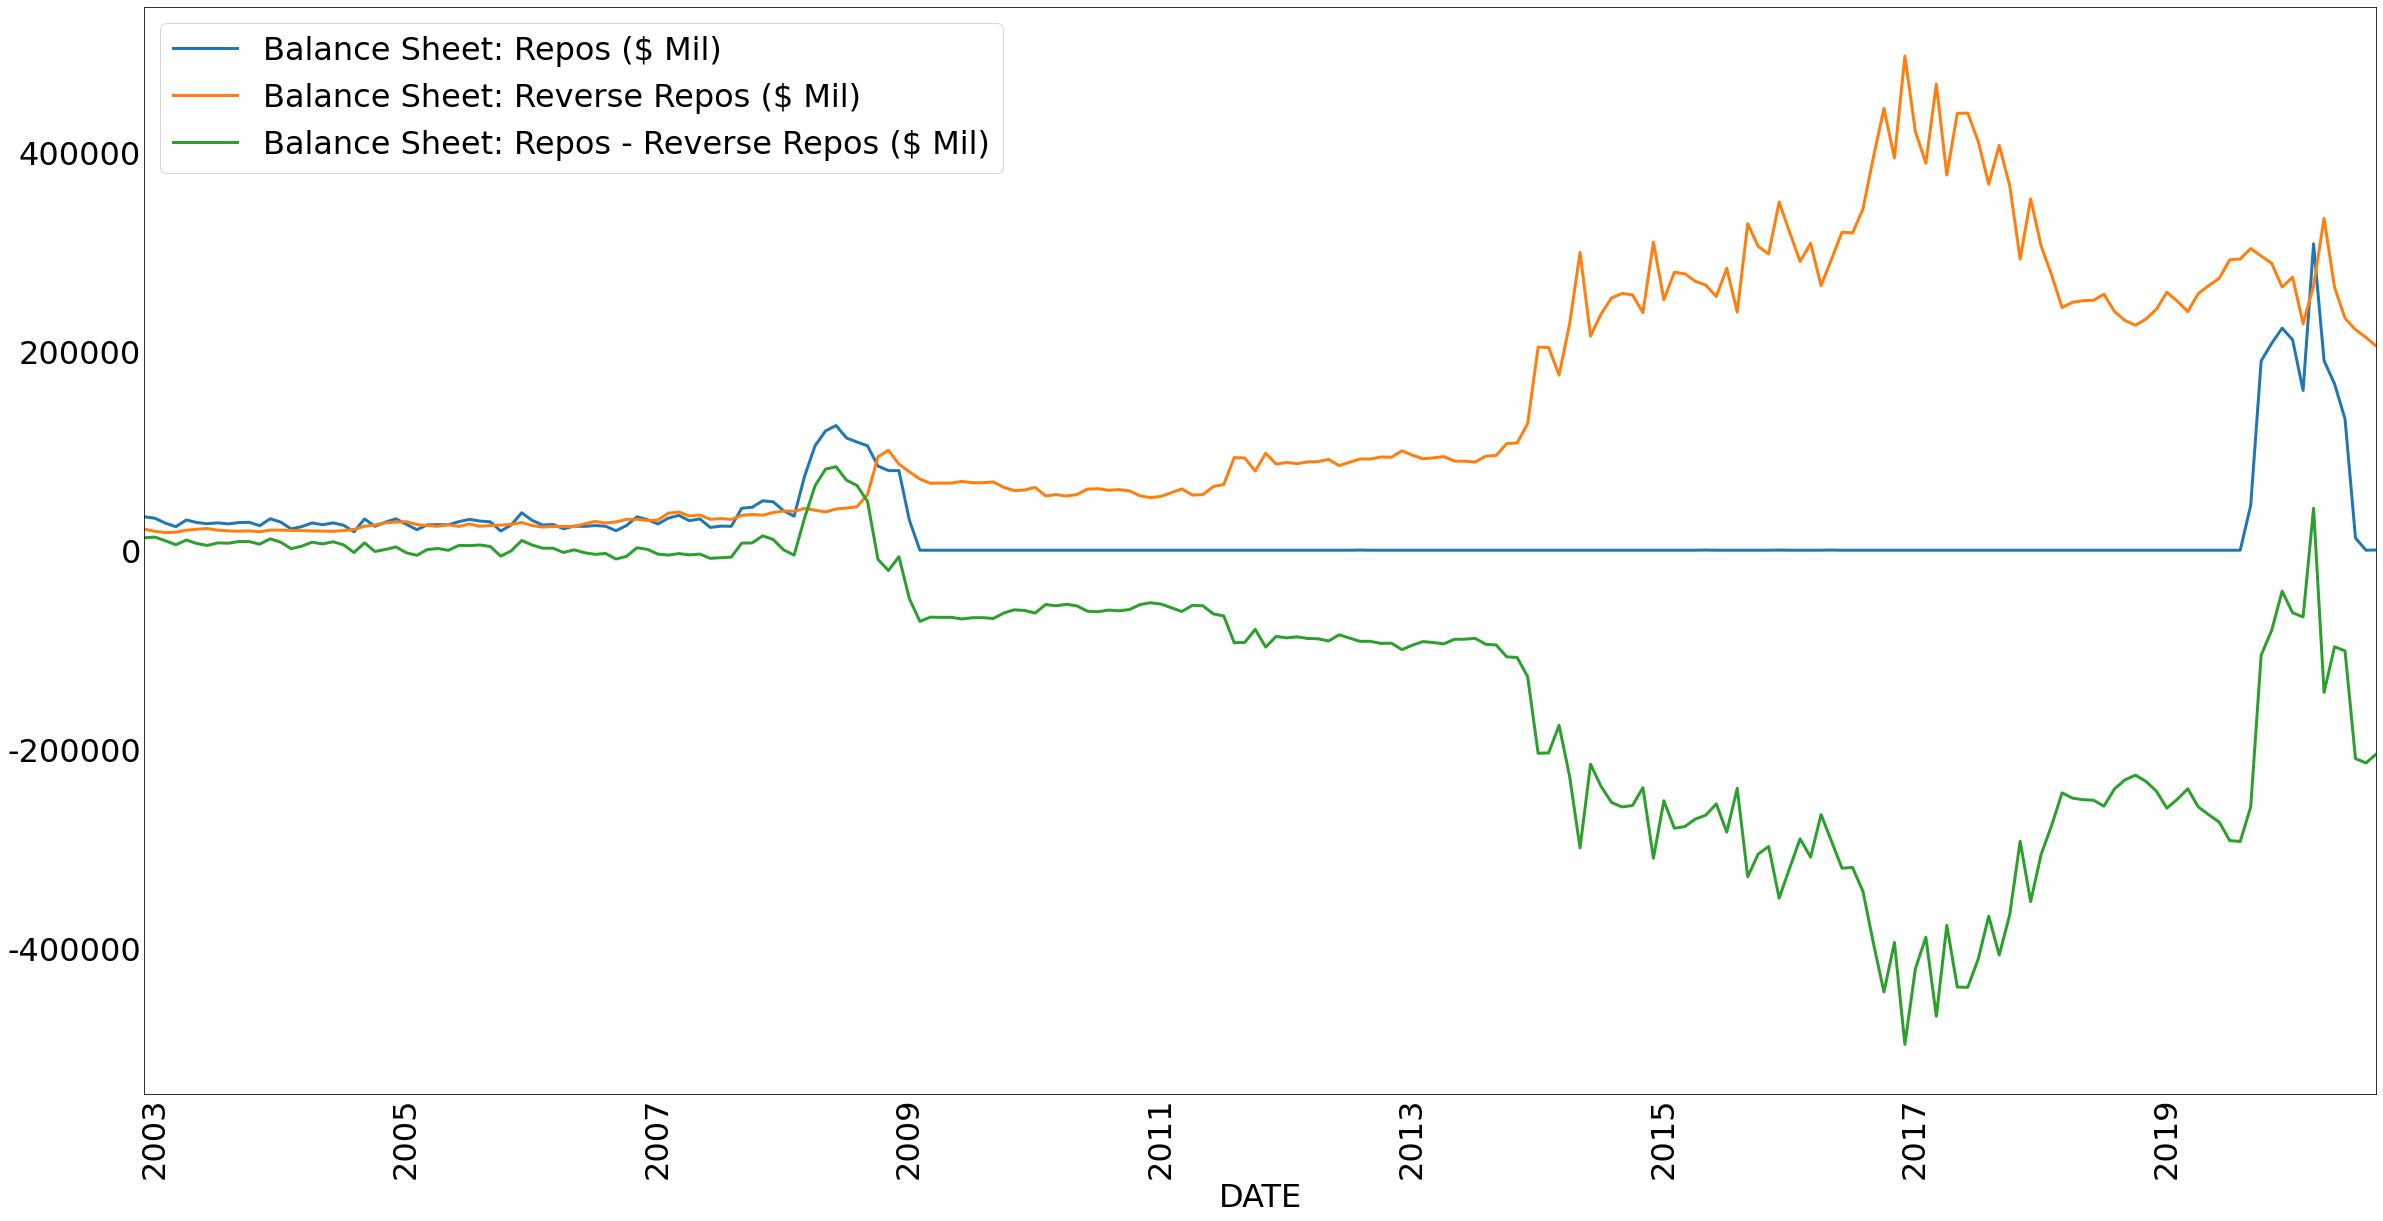

In [26]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"]=\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])

overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                 "Balance Sheet: Reverse Repos ($ Mil)",
                 "Balance Sheet: Repos - Reverse Repos ($ Mil)"]

plot_lines(data[overnight_vars], linewidth = 3)

The Fed intervenes in the overnight lending market with the intention of influencing the total expenditures, which includes investment. This policy is guided by the Fed's interest rate target. After '08, the accomplishment of the federal funds target is supported by the setting of the rate paid on excess reserves held at the Fed.

The Fed ha typically been a net borrow in the overnight lending market. This is shown by the fact that the value of reverse repos is greater than the value of repos, this means the Fed operations have the effect of creating less funds available to investors in the overnight market

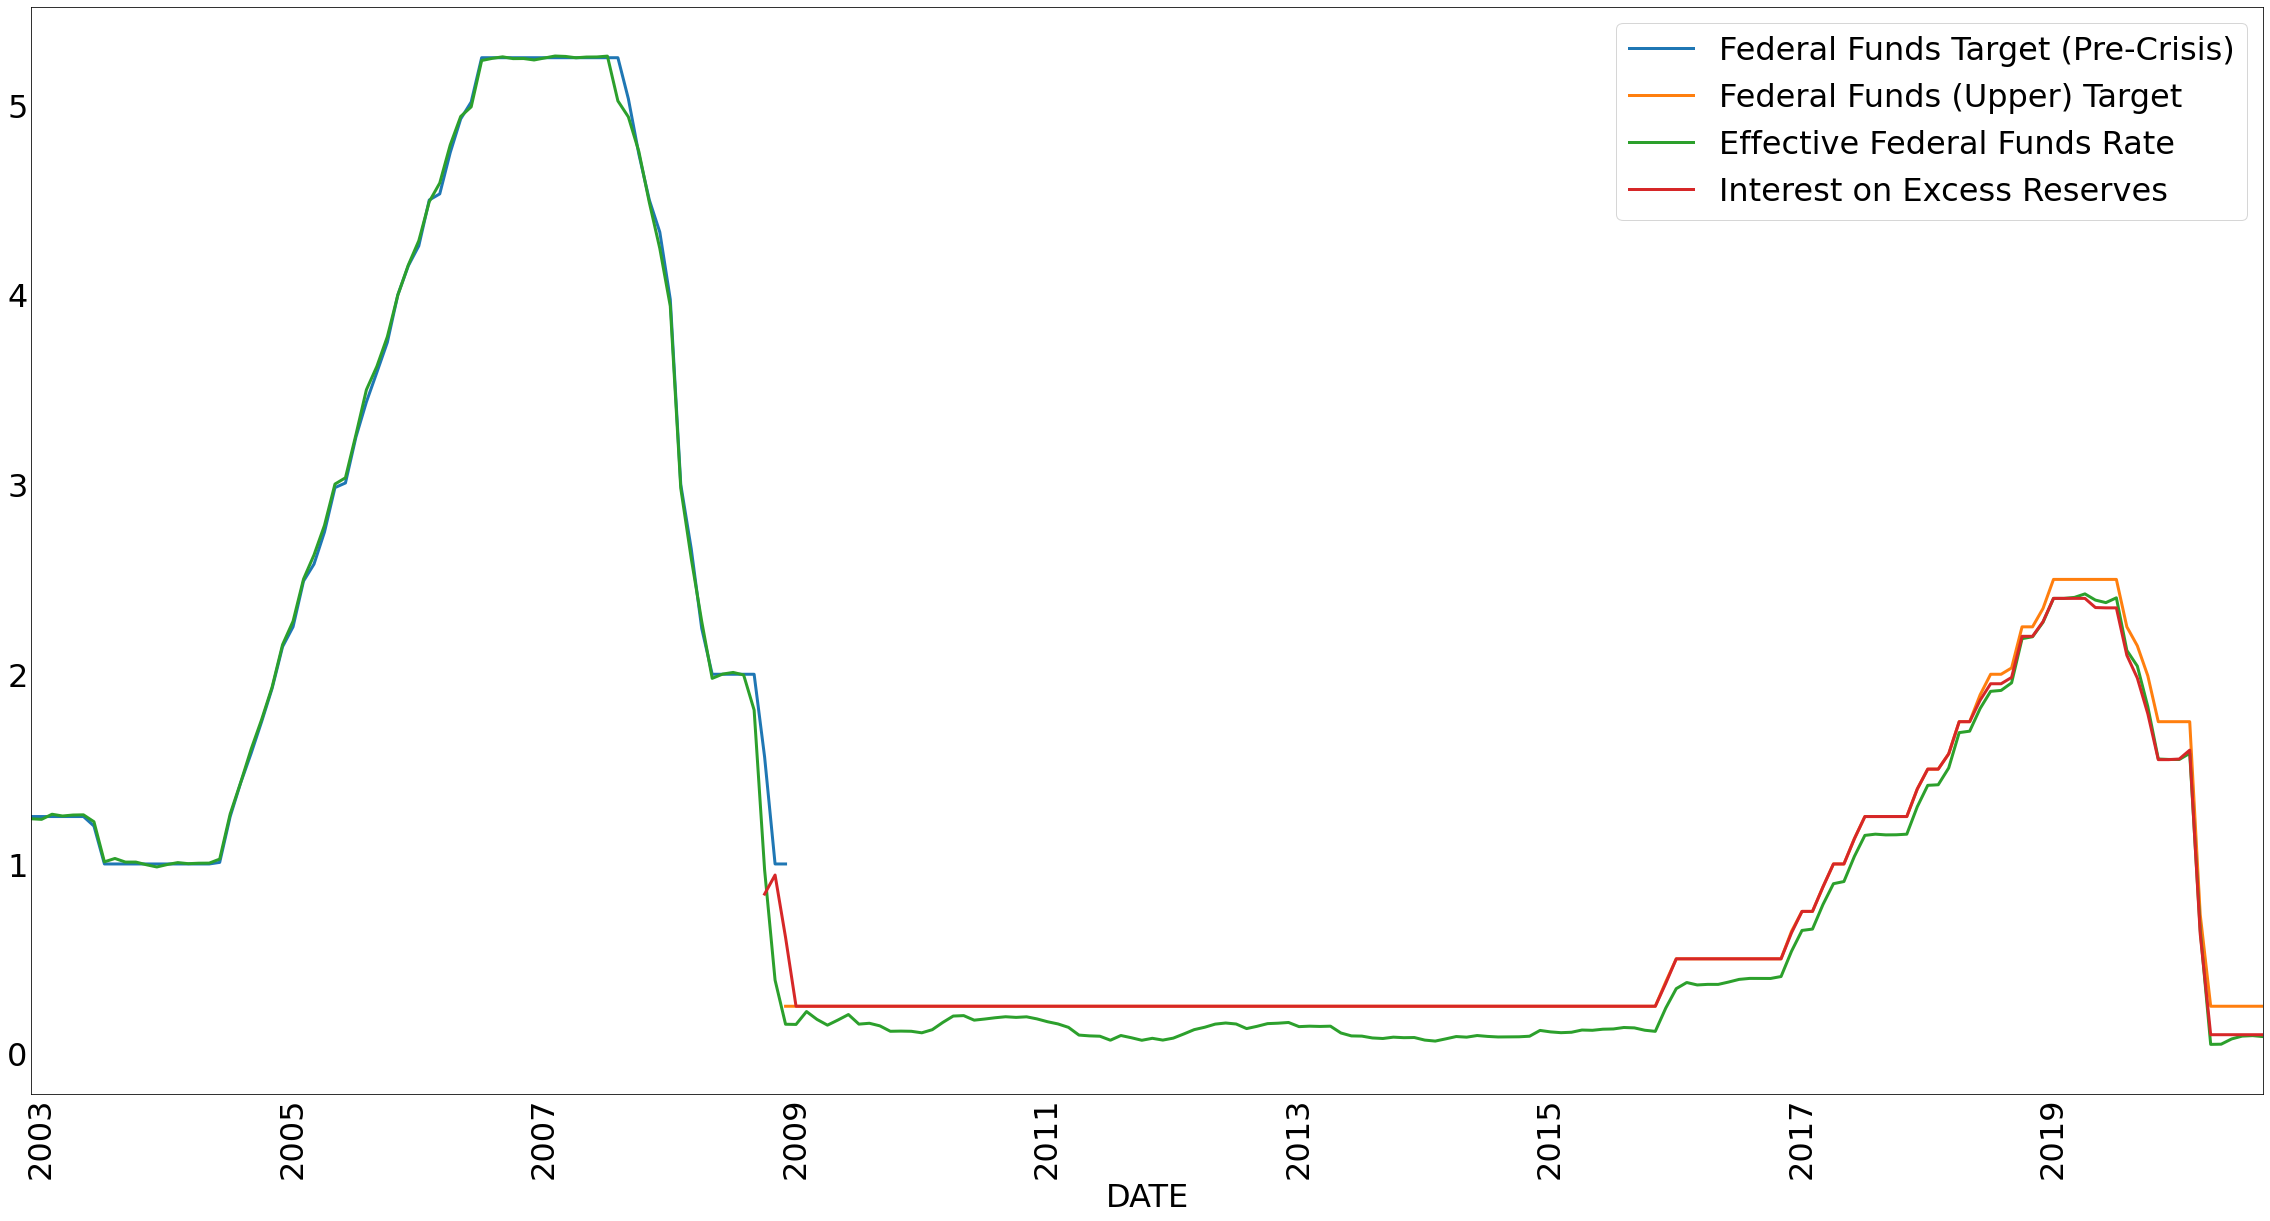

In [27]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                "Federal Funds (Upper) Target",
                "Effective Federal Funds Rate",
                "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 3)

For a long time after 2008, the Fed funds rate was actually below the target. Since the rate paid on reserves was actually greater than the effective interest rate, lending in the overnight market basically dried up. This is because banks could hold money at the red line for interest, instead of holding it at the green at the Fed. The overnight lending market became disfunctional in 2008, so once the new framework came about, it dried up. 

# Balance Sheet Summary

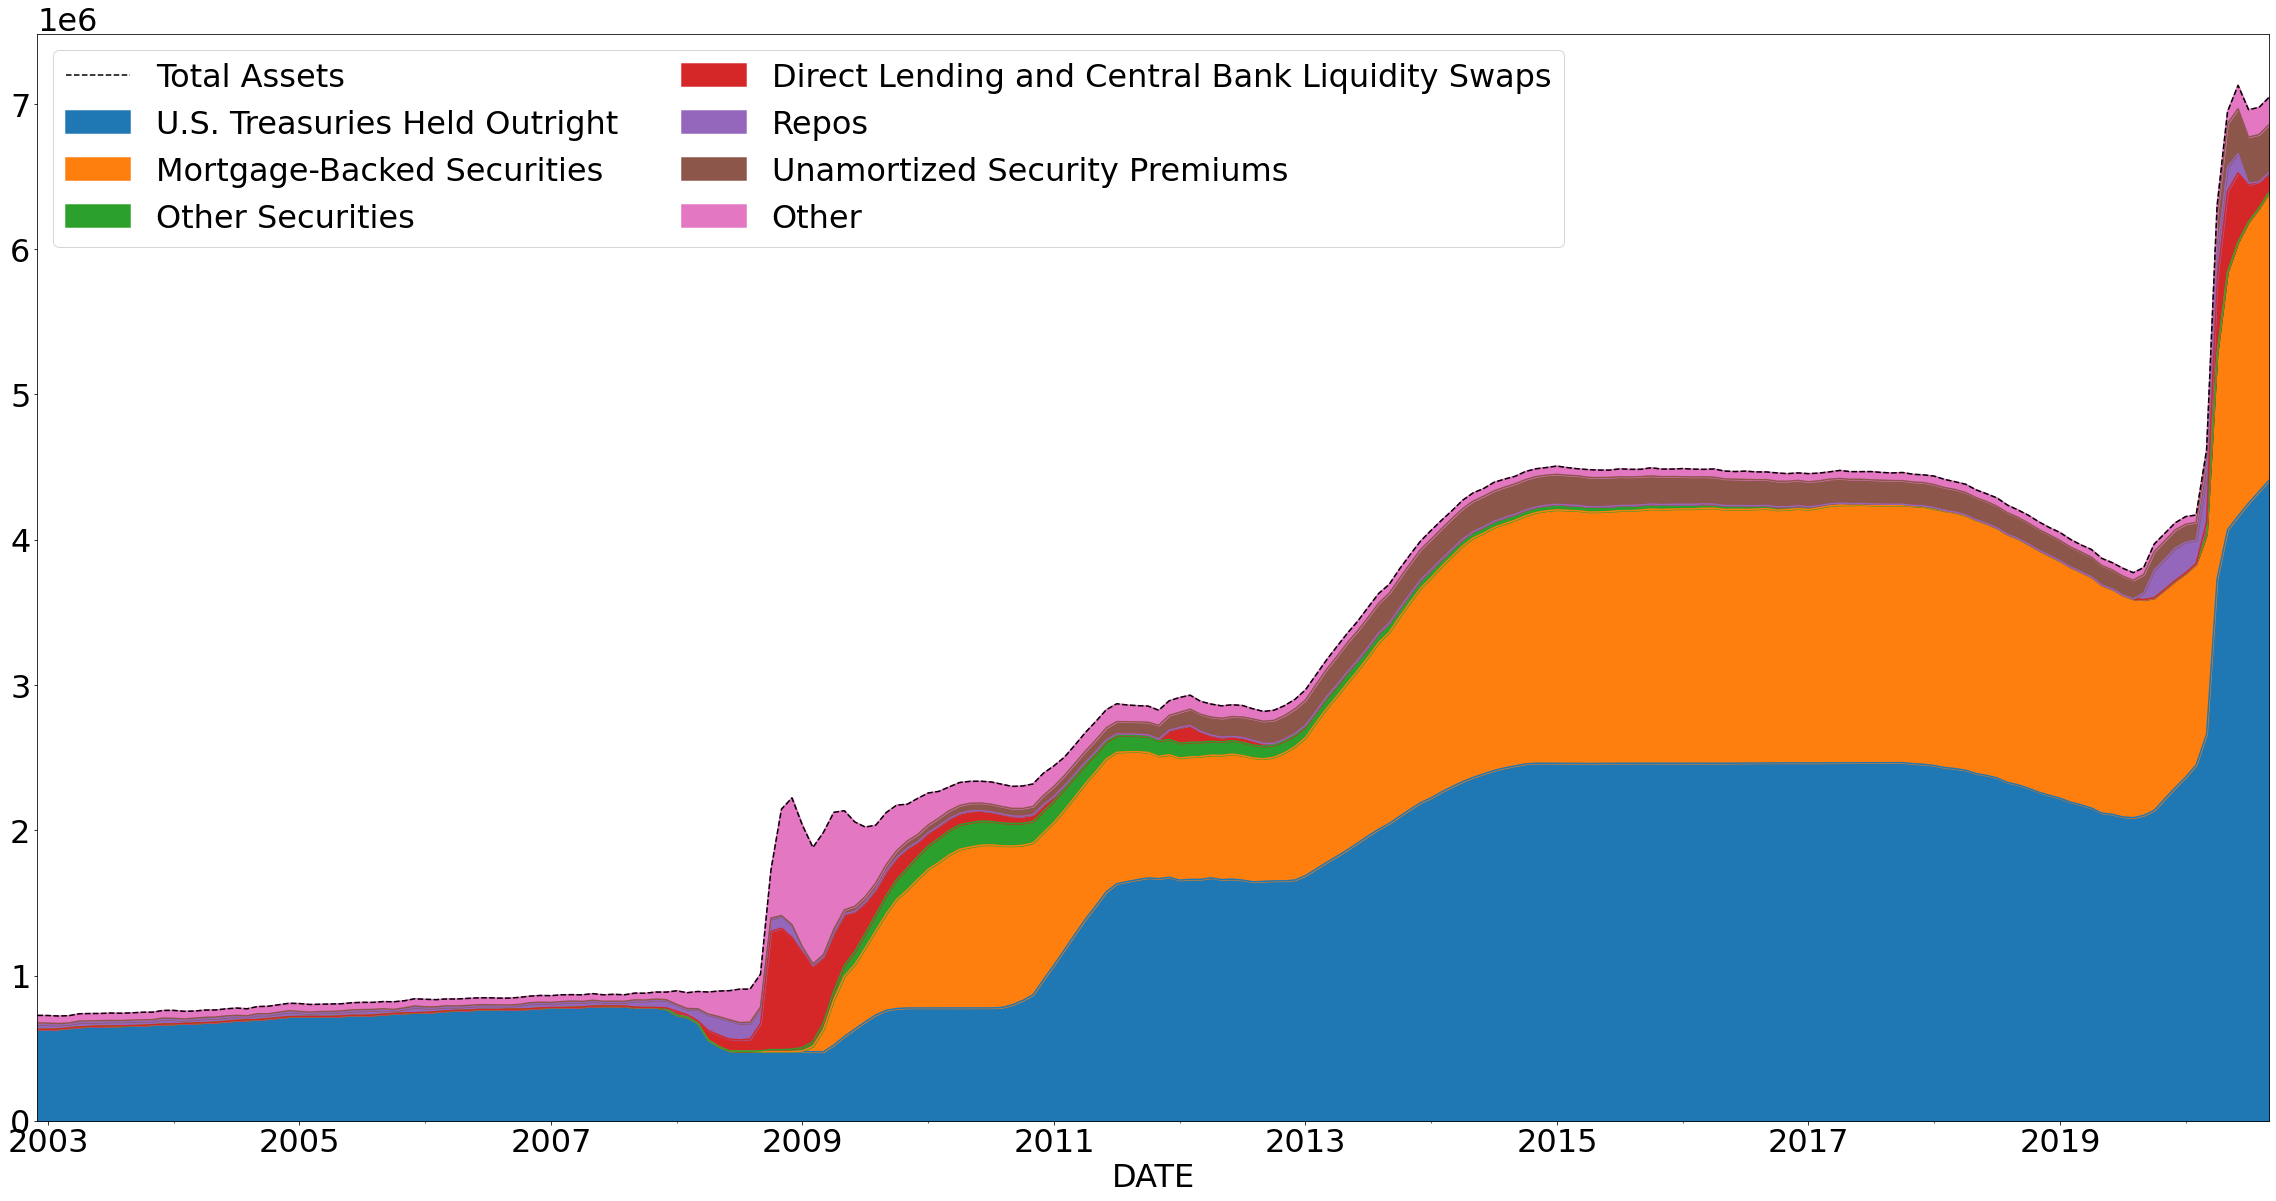

In [28]:
#fedProject

data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"] =\
    data["Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"].add(
    data["Balance Sheet: Direct Lending ($ Mil)"])
data["Balance Sheet: Other Securities"] = data["Balance Sheet: Securities Held Outright ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Mortgage-Backed Securities ($ Mil)"])
data["Balance Sheet: Other"] = data["Balance Sheet: Total Assets ($ Mil)"].sub(
    data["Balance Sheet: Securities Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"]).sub(
    data["Balance Sheet: Repos ($ Mil)"]).sub(
    data["Balance Sheet: Unamortized Security Premiums ($ Mil)"])

account_vars = ["U.S. Treasuries Held Outright",
               "Mortgage-Backed Securities",
               "Other Securities",
               "Direct Lending and Central Bank Liquidity Swaps",
               "Repos",
               "Unamortized Security Premiums",
               "Other"]

#In this example, we renamed the columns so that Balance Sheet: and ($ Mil were removed)
plot_stacked_lines(
    data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()}),
    account_vars, linewidth = 1.5,
    total_var = "Total Assets")

The graph above shows the Fed's assets divided between: U.S. Treasuries, Mortgage Backed Securities, Direct Lending to Private and Central Banks, Repurchase Agreements, Unamortized Security Premiums, and "Other"

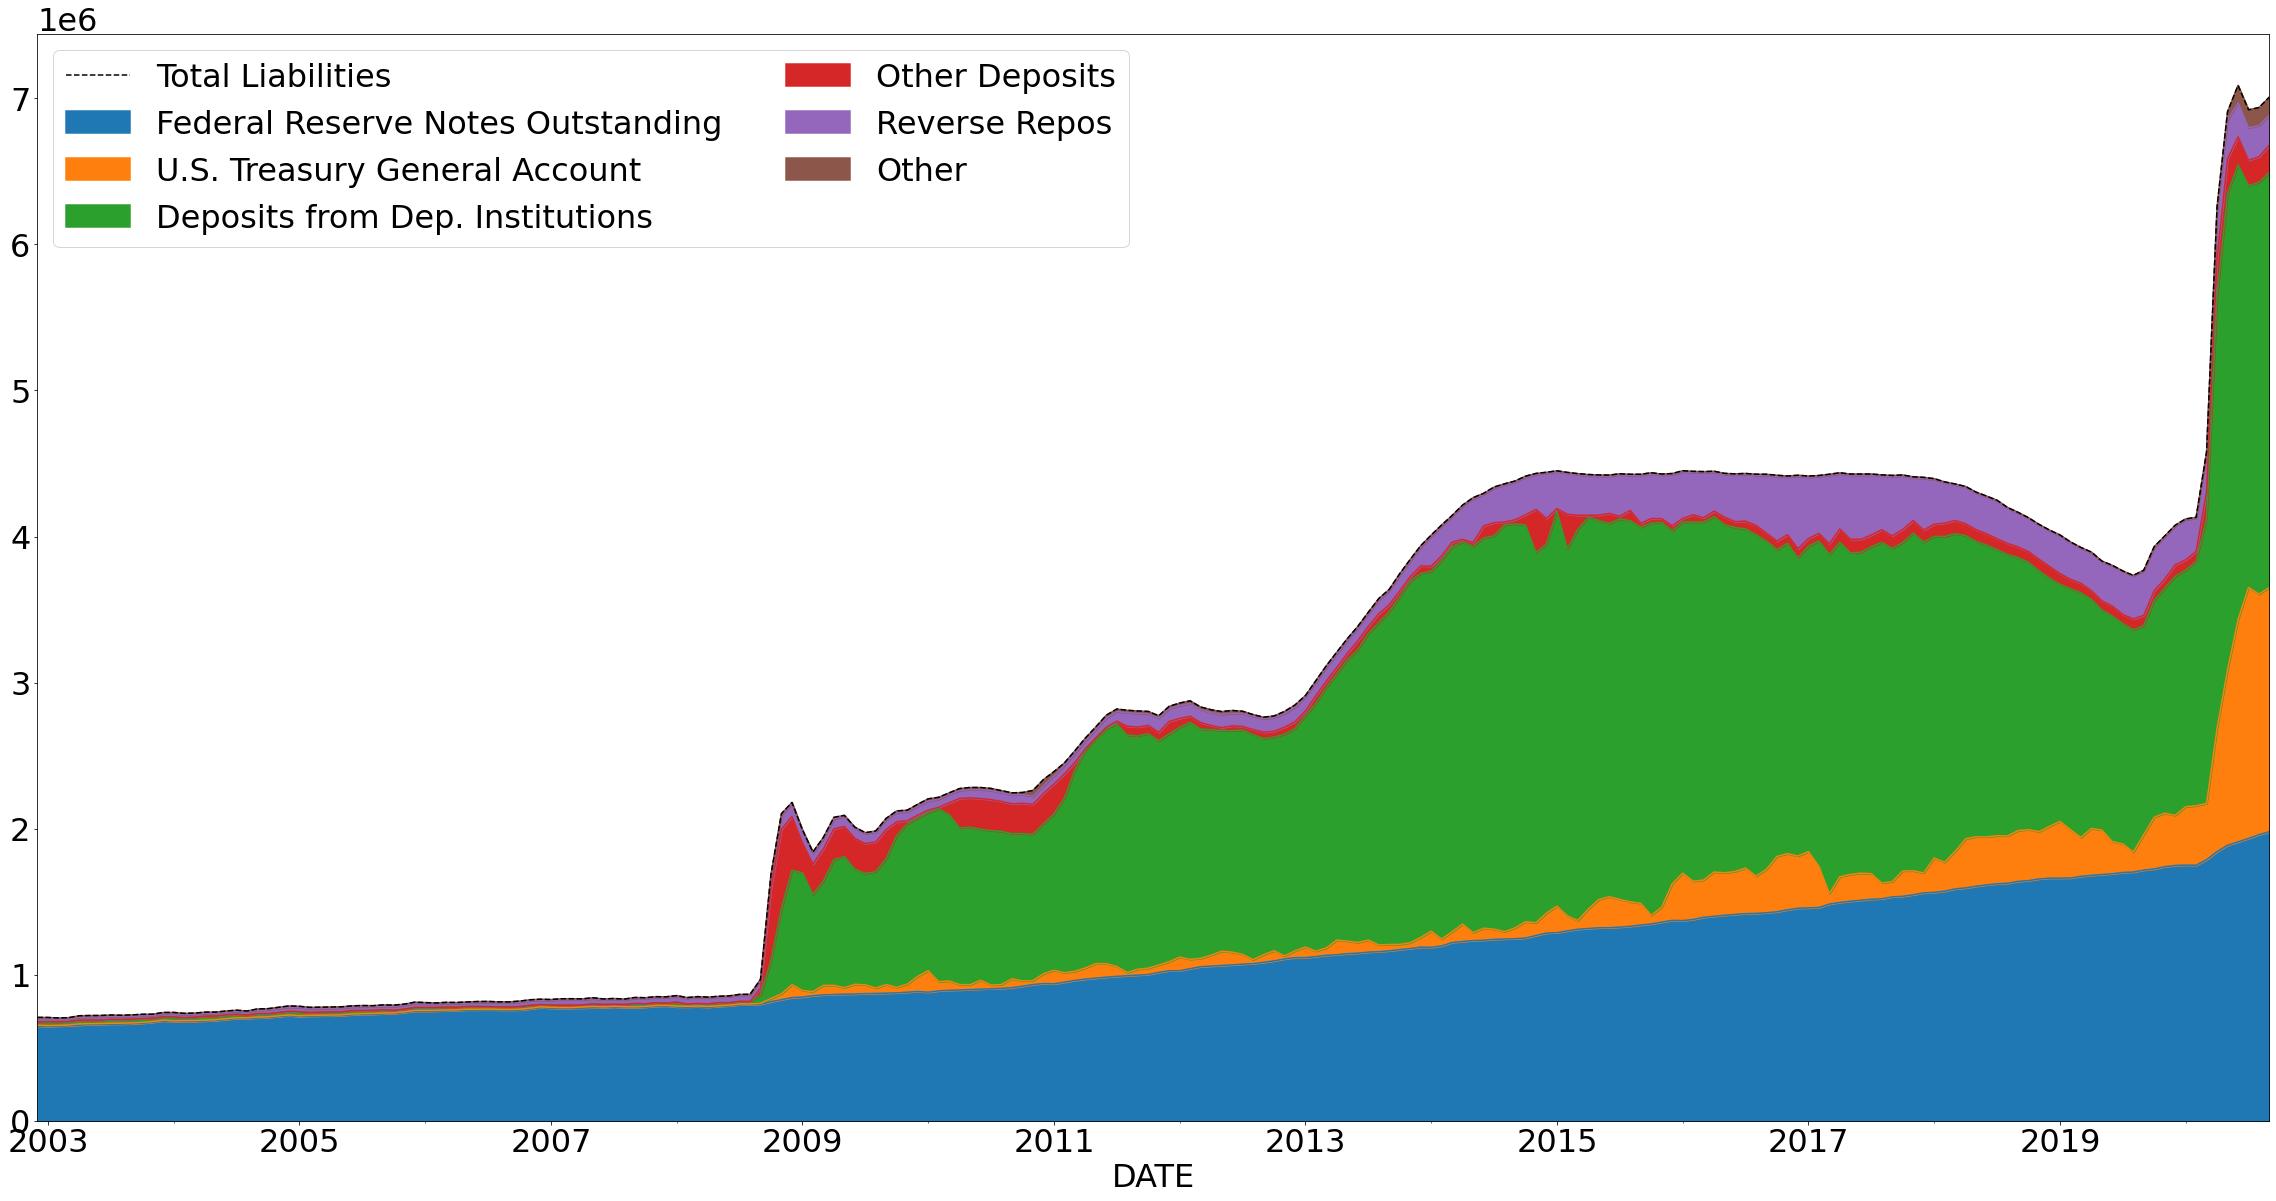

In [29]:
data["Balance Sheet: Other Deposits ($ Mil)"] = data["Balance Sheet: All Deposits ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"])
data["Balance Sheet: Other"]= data["Balance Sheet: Total Liabilities ($ Mil)"].sub(
    data["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)"]).sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"]).sub(
    data["Balance Sheet: Other Deposits ($ Mil)"]).sub(
    data["Balance Sheet: Reverse Repos ($ Mil)"])

account_vars = ["Federal Reserve Notes Outstanding",
                "U.S. Treasury General Account",
                "Deposits from Dep. Institutions",
                "Other Deposits",
                "Reverse Repos",
                "Other"]

plot_stacked_lines(
    data.rename(columns = {key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()}),
    account_vars, linewidth = 1.5,
    total_var = "Total Liabilities")

This graph visualizes the liabilities of the Fed through all the main components: Notes Outstanding, U.S. Treasury General Account, Deposits from Depositing Institutions, Other Deposits, Reverse Repos, and "Other"